<h1  style="text-align: center"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Loan Default Prediction</span>  </h1>

#### Objective/Problem Statement

The Bank provided loan to there Customers, And the Bank cannot approch/check individually customer so it needs to understand the drive of who wont be able pay the EMI or who would skip the EMI

#### Analysis Goal

* Do the Explotary analysis on the Data
* Build the Model to Predict who would skip EMI 
* By Evaluating the model and improving models Prediction accuracy

#### Key Deliverables

 - EDA of Data
 - Model Building 
 - Accuracy of the Model

#### Data

Data used is application_data.csv
<br>link :
https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter

#### Methodology

- Perform EDA and identify the Independent and Dependent Varibles
- Present EDA visually
- Build predictive Models
- get the Best model out of it

<h2  style="text-align: left;font-size: 2rem"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Library</span>  </h2>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

from sklearn import preprocessing

<h2  style="text-align: left;font-size: 2rem"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Data Loading</span>  </h2>


In [2]:
data=pd.read_csv('application_data_1.csv',index_col='SK_ID_CURR')
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,...,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,...,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,...,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,...,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,...,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0


<h2  style="text-align: left;font-size: 2rem"  class="list-group-item list-group-item-warning"> <span style="color:#2E6AA9">Data Information</span>  </h2>


In [3]:
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,...,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,...,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,...,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,...,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,...,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0


#### Data dimention

In [4]:
data.shape

(307511, 43)

#### About data


In [5]:
about=pd.read_excel('file_1.xlsx',)
about

,Index,Description,Data Type,Type of Varible
0,TARGET,It is the Dependent Variable,int64,Catagorical
1,NAME_CONTRACT_TYPE,Type of Loan Provided,object,Catagorical
2,CODE_GENDER,Gender of the Customer,object,Catagorical
3,FLAG_OWN_CAR,Does the Customer own a Car,object,Catagorical
4,FLAG_OWN_REALTY,Does the Customer own any land,object,Catagorical
5,CNT_CHILDREN,How many Childerns do Customer have,int64,Discrete
6,AMT_INCOME_TOTAL,Annual Income of the Customer,float64,Continous
7,AMT_CREDIT,what is the Credit taken by customer,float64,Continous
8,AMT_ANNUITY,what is the amount paid by customer annually,float64,Continous
9,NAME_TYPE_SUITE,Who is accompaning the Customer,object,Catagorical



#### Snapshot of the data

<img src="Capture.jpg">

#### Data type

In [6]:
data.dtypes.value_counts()

int64      19
object     12
float64    12
dtype: int64

In [7]:
data.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_ID_PUBLISH                  int64
OWN_CAR_AGE                    float64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS          

#### Data Settings

In [8]:
data['DAYS_BIRTH_YEARS']=abs(data['DAYS_BIRTH']/365).astype('int64')
data['YEARS_ID_PUBLISH']=round(abs(data['DAYS_ID_PUBLISH']/365),0)
data['YEARS_EMPLOYED']=round(abs(data['DAYS_EMPLOYED']/365),0)                       

In [9]:
data[data['YEARS_EMPLOYED']==1001]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEARS,YEARS_ID_PUBLISH,YEARS_EMPLOYED
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,Children,...,XNA,0.0,0.0,0.0,0.0,0.0,1.0,55,10.0,1001.0
100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,Children,...,XNA,0.0,0.0,0.0,0.0,0.0,2.0,55,7.0,1001.0
100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,Unaccompanied,...,XNA,0.0,0.0,0.0,0.0,0.0,3.0,68,10.0,1001.0
100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,Unaccompanied,...,XNA,0.0,0.0,0.0,0.0,0.0,2.0,65,14.0,1001.0
100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,Unaccompanied,...,XNA,0.0,0.0,0.0,0.0,0.0,3.0,64,13.0,1001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,Unaccompanied,...,XNA,0.0,0.0,0.0,1.0,0.0,0.0,61,11.0,1001.0
456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,Unaccompanied,...,XNA,0.0,0.0,0.0,0.0,0.0,5.0,68,12.0,1001.0
456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,Unaccompanied,...,XNA,0.0,0.0,0.0,0.0,1.0,8.0,63,11.0,1001.0


In [10]:
del(data['DAYS_BIRTH'],data['DAYS_ID_PUBLISH'],data['DAYS_EMPLOYED'])

In [11]:
data['TARGET_Class']= data.TARGET.map({1:'Default',0:'Not Default'})
data.FLAG_OWN_CAR=data.FLAG_OWN_CAR.map({"Y":"Yes","N":"No"})
data.FLAG_OWN_REALTY=data.FLAG_OWN_REALTY.map({"Y":"Yes","N":"No"})
data.CODE_GENDER=data.CODE_GENDER.map({"M":"Male","F":"Female"})
data.FLAG_CONT_MOBILE=data.FLAG_CONT_MOBILE.map({1:"Yes",0:"NO"})
data.FLAG_PHONE=data.FLAG_PHONE.map({1:'YES',0:'NO'})
data.FLAG_EMAIL=data.FLAG_EMAIL.map({1:'YES',0:'NO'})
data.REG_REGION_NOT_LIVE_REGION=data.REG_REGION_NOT_LIVE_REGION.map({1:"DIFFERENT",0:"SAME"})
data.REG_REGION_NOT_WORK_REGION=data.REG_REGION_NOT_WORK_REGION.map({1:"DIFFERENT",0:"SAME"})
data.LIVE_REGION_NOT_WORK_REGION=data.LIVE_REGION_NOT_WORK_REGION.map({1:"DIFFERENT",0:"SAME"})
data.REG_CITY_NOT_WORK_CITY=data.REG_CITY_NOT_WORK_CITY.map({1:"DIFFERENT",0:"SAME"})
data.LIVE_CITY_NOT_WORK_CITY=data.LIVE_CITY_NOT_WORK_CITY.map({1:"DIFFERENT",0:"SAME"})
data.REG_CITY_NOT_LIVE_CITY=data.REG_CITY_NOT_LIVE_CITY.map({1:"DIFFERENT",0:"SAME"})
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEARS,YEARS_ID_PUBLISH,YEARS_EMPLOYED,TARGET_Class
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,Male,No,Yes,0,202500.0,406597.5,24700.5,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,1.0,25,6.0,2.0,Default
100003,0,Cash loans,Female,No,No,0,270000.0,1293502.5,35698.5,Family,...,0.0,0.0,0.0,0.0,0.0,0.0,45,1.0,3.0,Not Default
100004,0,Revolving loans,Male,Yes,Yes,0,67500.0,135000.0,6750.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,52,7.0,1.0,Not Default
100006,0,Cash loans,Female,No,Yes,0,135000.0,312682.5,29686.5,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,52,7.0,8.0,Not Default
100007,0,Cash loans,Male,No,Yes,0,121500.0,513000.0,21865.5,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,54,9.0,8.0,Not Default


In [12]:
data.REGION_RATING_CLIENT=data.REGION_RATING_CLIENT.astype(str)
data.REGION_RATING_CLIENT_W_CITY=data.REGION_RATING_CLIENT_W_CITY.astype(str)

#### Numerical and categorical columns

In [13]:
Numerical=data.select_dtypes({"int64","float64"}).columns.tolist()
Numerical

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'DAYS_BIRTH_YEARS',
 'YEARS_ID_PUBLISH',
 'YEARS_EMPLOYED']

In [14]:
categorical=data.select_dtypes({"object"}).columns.tolist()
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'TARGET_Class']

# Univariate analysis


### Categorical

In [15]:
def UVA_category(data,cat_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(cat_group)
    plt.figure(figsize = (8*size,5), dpi = 100)

    # for every variable
    for j,i in enumerate(cat_group):
        norm_count = data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
  
        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count.index ,norm_count, order = norm_count.index)
        plt.xlabel('{}'.format(i), fontsize = 20)
        plt.ylabel('fraction/percent', fontsize = 20)
        plt.title('Distribution of {}'.format(i))


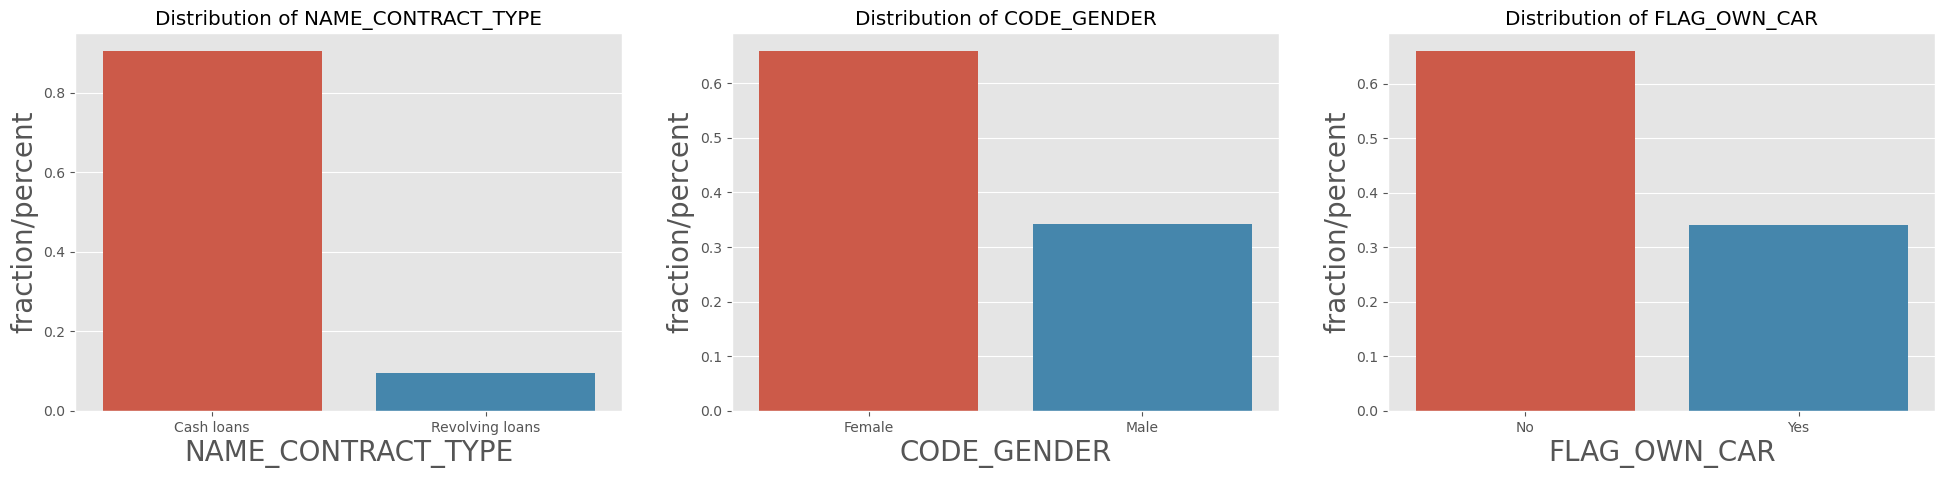

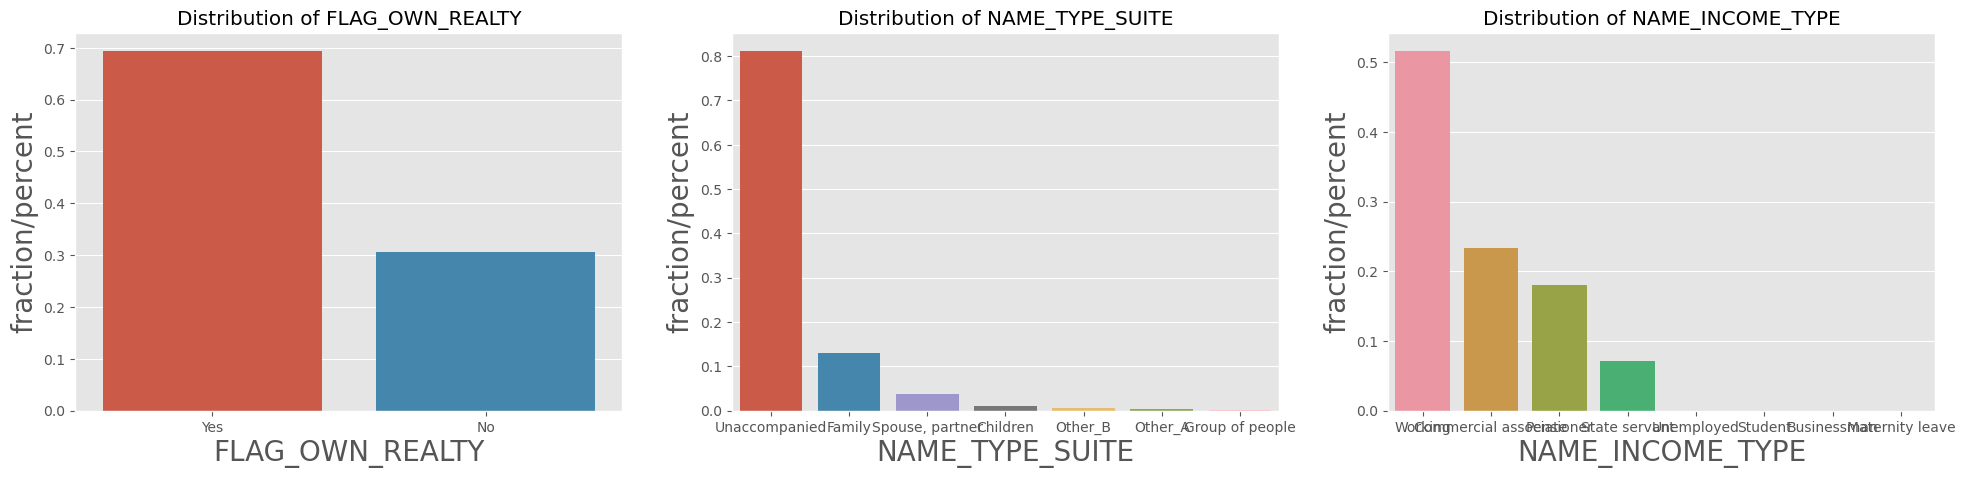

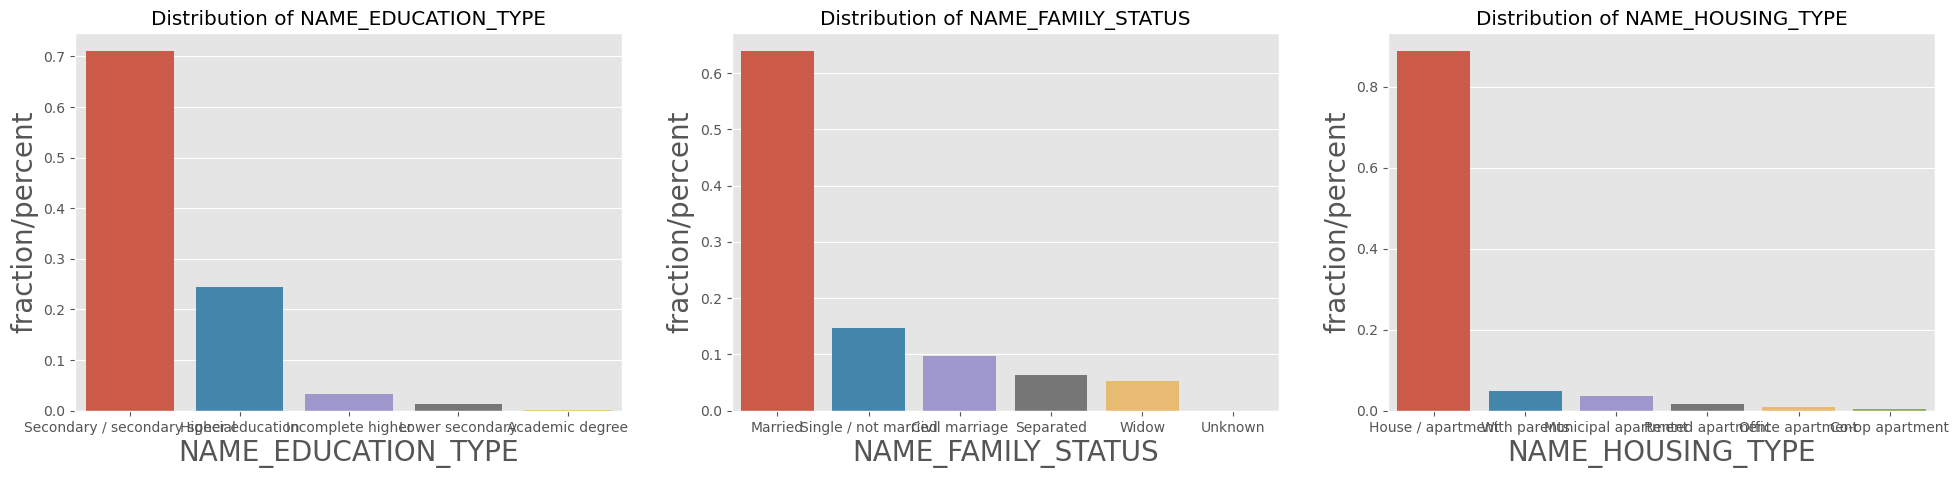

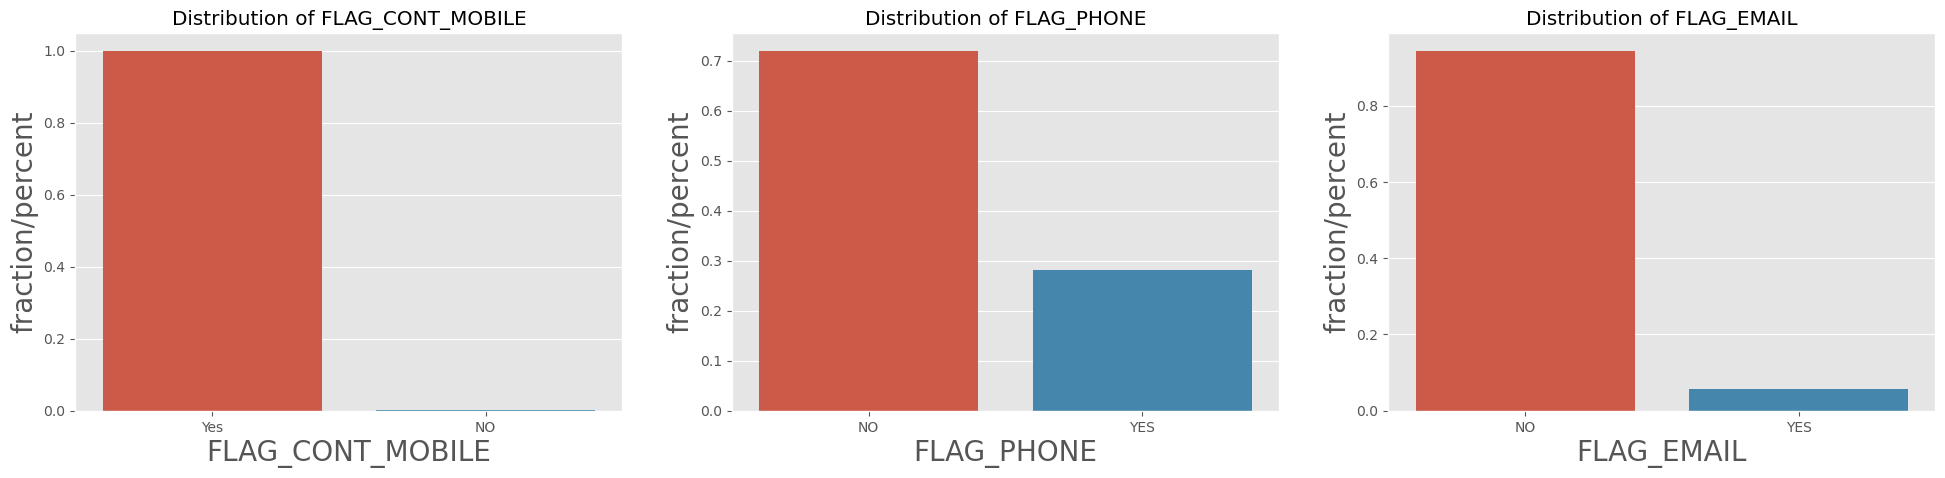

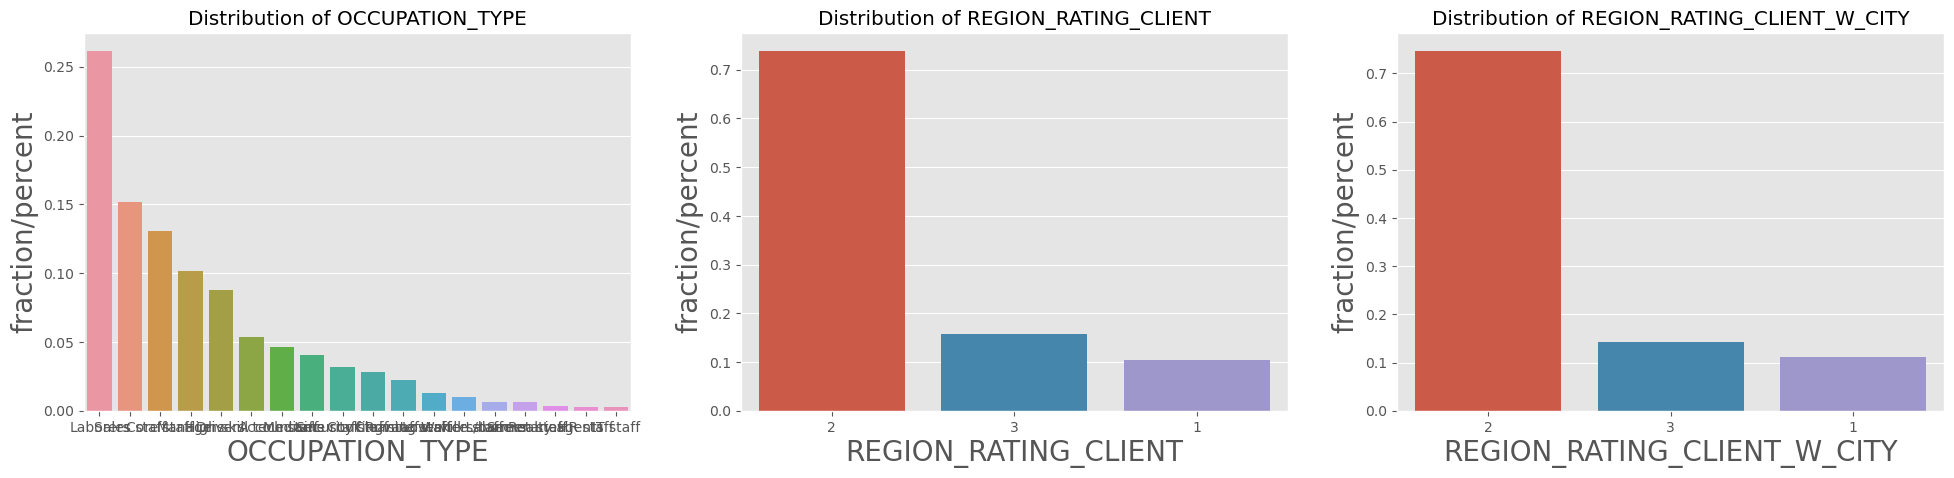

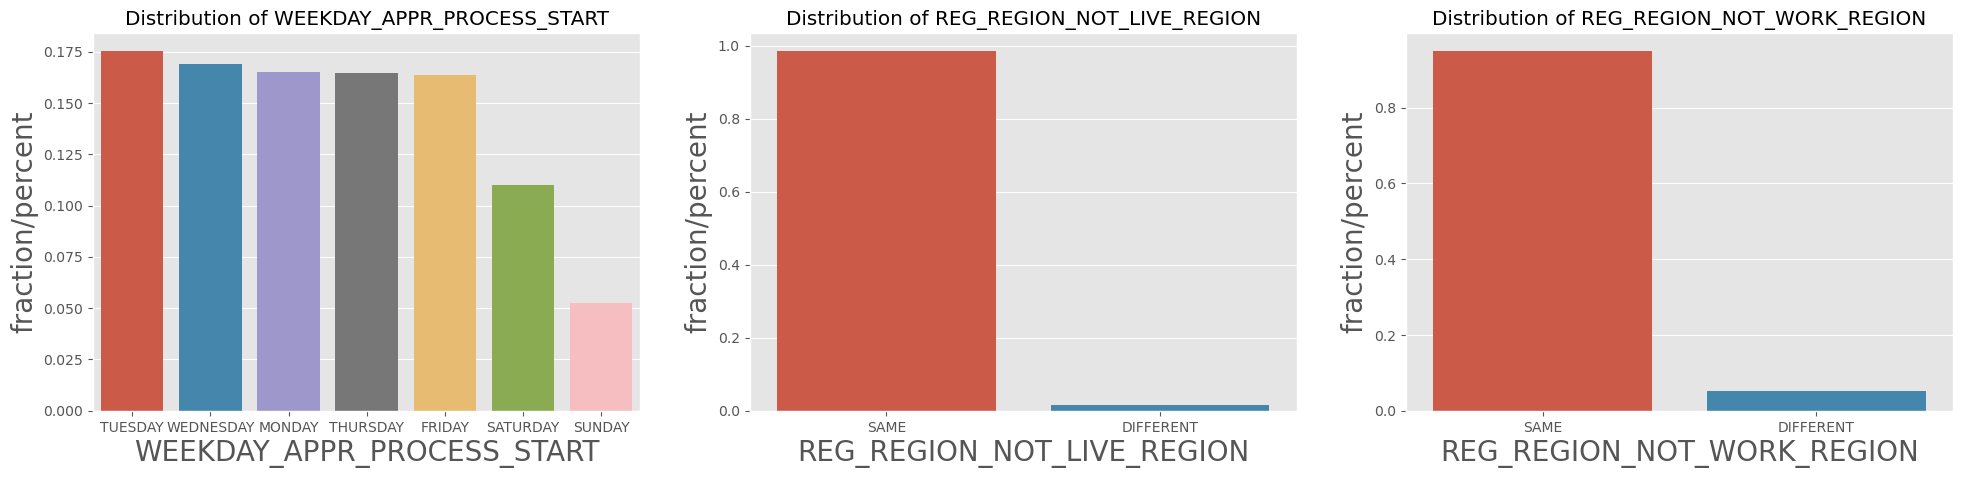

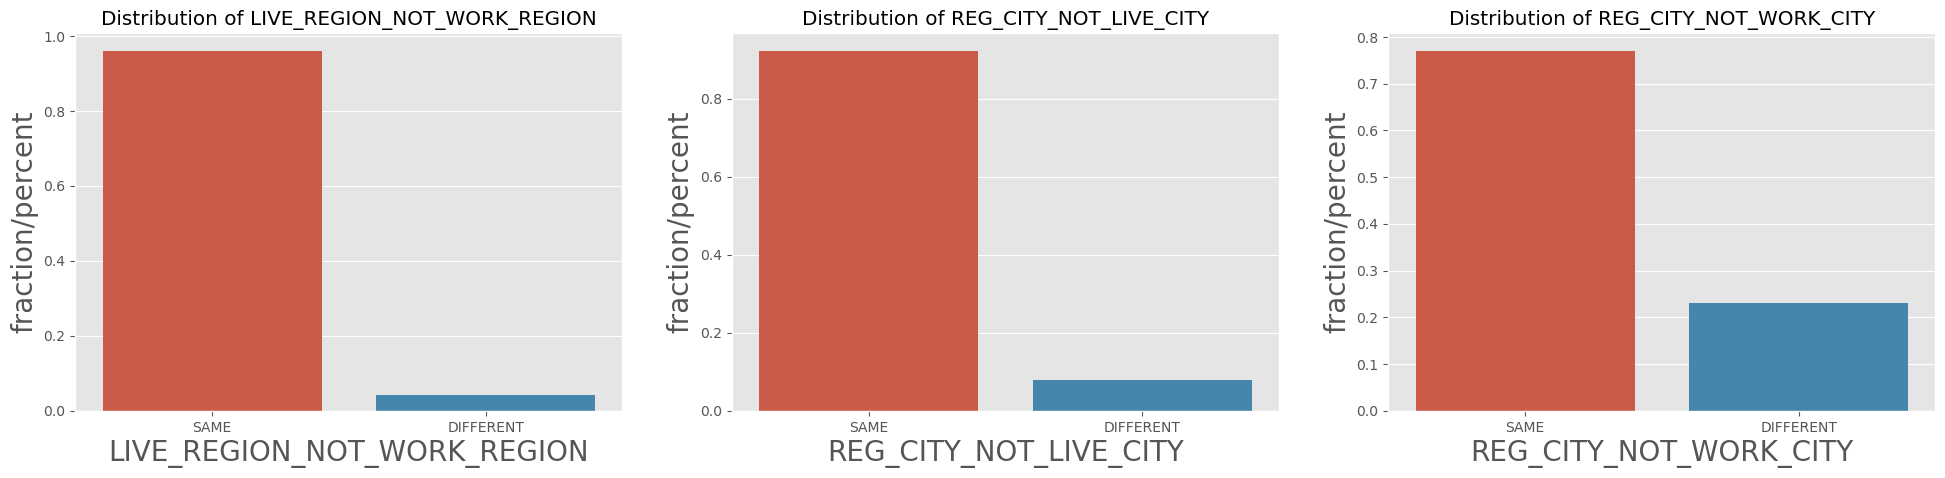

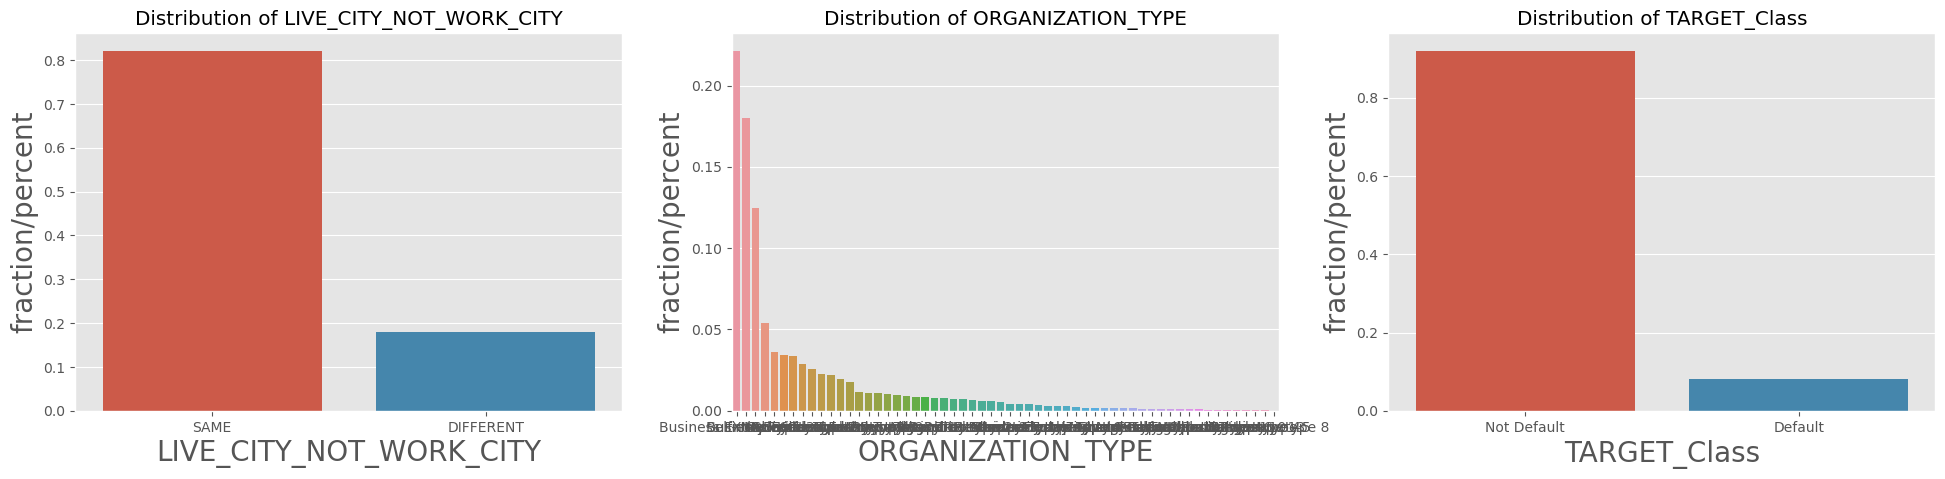

In [16]:
for i in range(0,len(categorical),3):
    UVA_category(data,categorical[i:i+3])

### Numerical

In [31]:
pd.options.display.float_format = '{:.2f}'.format

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,307511.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00
CNT_CHILDREN,307511.00,0.42,0.72,0.00,0.00,0.00,1.00,19.00
AMT_INCOME_TOTAL,307511.00,168797.92,237123.15,25650.00,112500.00,147150.00,202500.00,117000000.00
AMT_CREDIT,307511.00,599026.00,402490.78,45000.00,270000.00,513531.00,808650.00,4050000.00
AMT_ANNUITY,307499.00,27108.57,14493.74,1615.50,16524.00,24903.00,34596.00,258025.50
REGION_POPULATION_RELATIVE,307511.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
OWN_CAR_AGE,104582.00,12.06,11.94,0.00,5.00,9.00,15.00,91.00
FLAG_EMP_PHONE,307511.00,0.82,0.38,0.00,1.00,1.00,1.00,1.00
FLAG_WORK_PHONE,307511.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
CNT_FAM_MEMBERS,307509.00,2.15,0.91,1.00,2.00,2.00,3.00,20.00


In [34]:
def UAEnumerical(data,cont_group):
    '''
    Univariate_Analysis_Numerical
    takes a group of variables (Continous) and plot/print all the value_counts and barplot.
    '''
    size=len(cont_group)
    plt.figure(figsize=(7*size,3),dpi=100)
    #looping for each variable
 
    for i,j in enumerate(cont_group):
        # calculating descriptives of variable
        _min=data[j].min()
        _max=data[j].max()
        _range=data[j].max()-data[j].min()
        mean=data[j].mean()
        median=data[j].median()
        stddev=data[j].std()
        
        # calculating points of standard deviation
        points = mean-stddev, mean+stddev
        
        #Plotting the variable with every information   
        plt.subplot(1,size,i+1)
        sns.kdeplot(data[j],color='orange',shade=True,bw=0.5)
        sns.lineplot(x=points,y=[0,0],color = 'black',label="std_dev")
        sns.scatterplot([_min,_max],[0,0],color='green',label="Min-Max")
        sns.scatterplot([mean], [0],color='red', label = "mean")
        sns.scatterplot([median],[0], color='yellow', label = "median")
        plt.xlabel('{}'.format(j), fontsize = 10)
        plt.ylabel('Density')
        plt.title('std_dev = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                       (round(_min,2),round(_max,2),round(_range,2)),
                                                                                                       round(mean,2),
                                                                                                       round(median,2)))

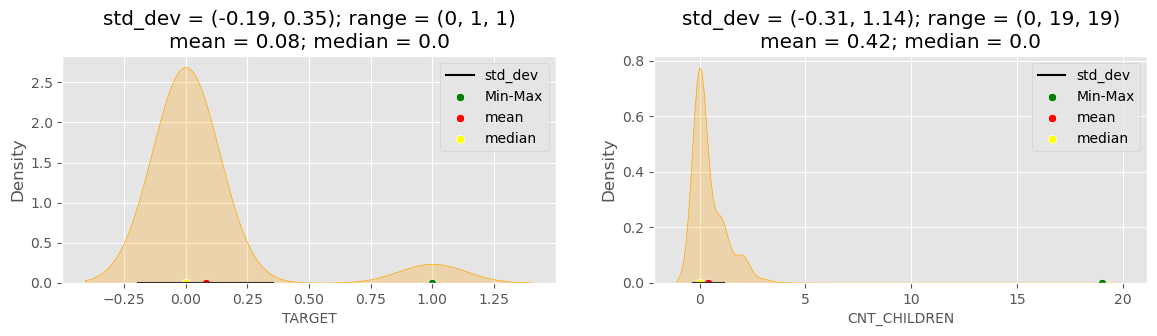

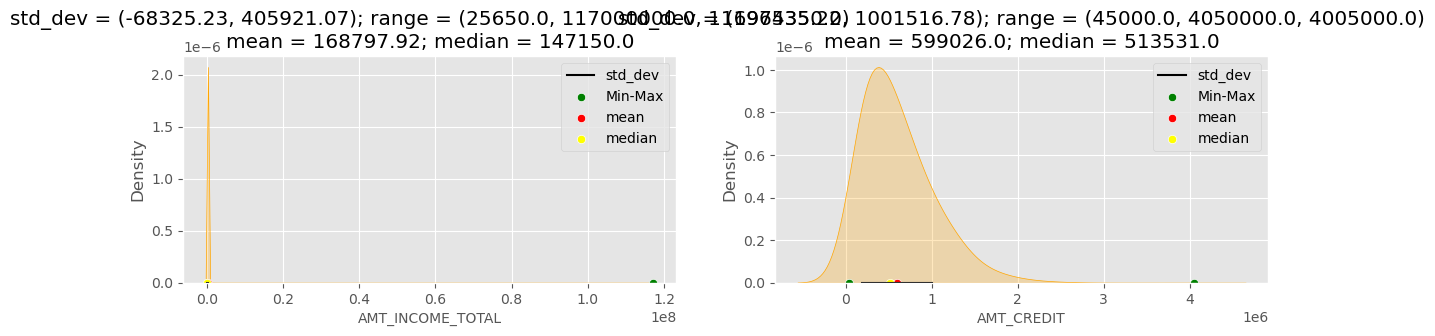

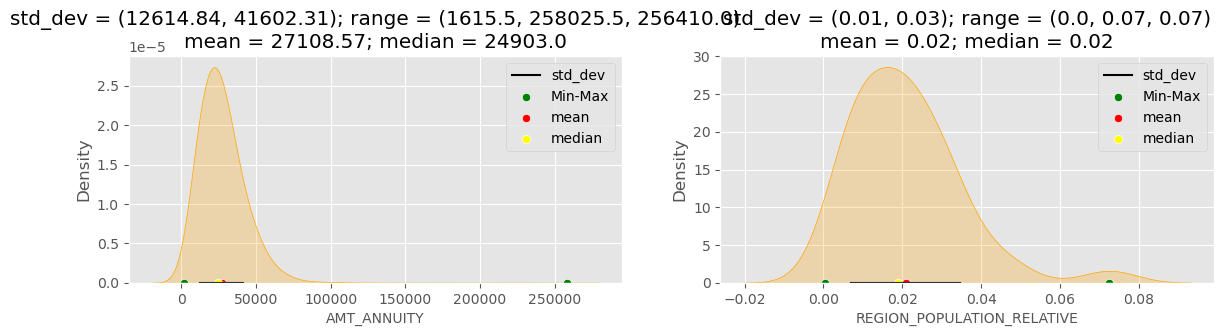

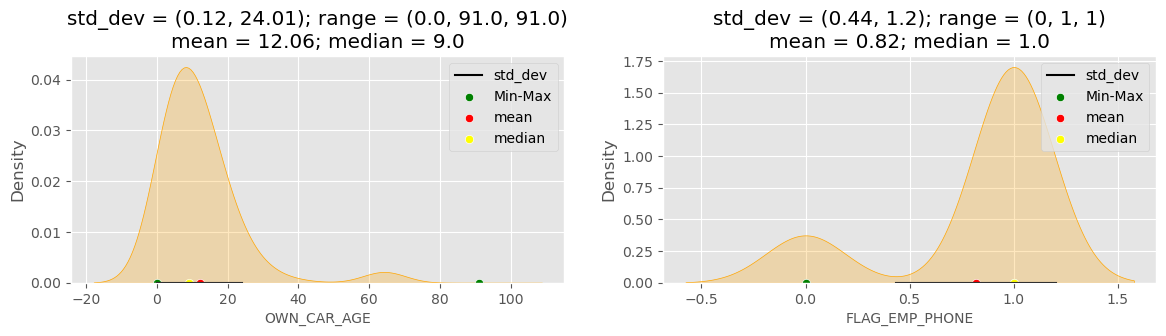

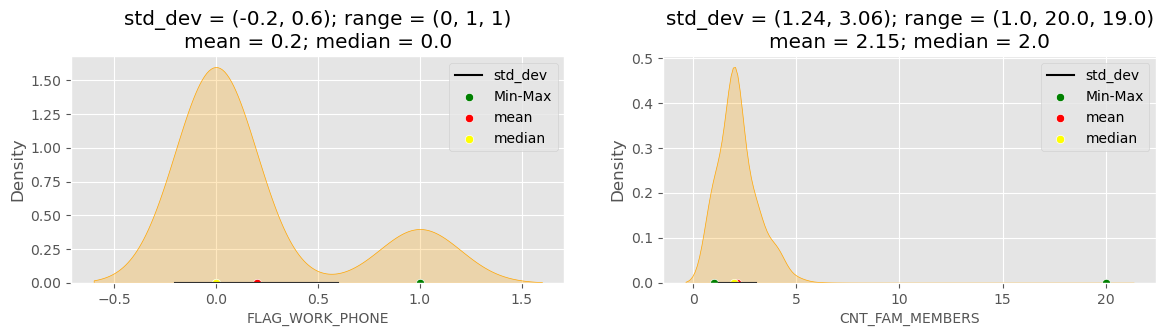

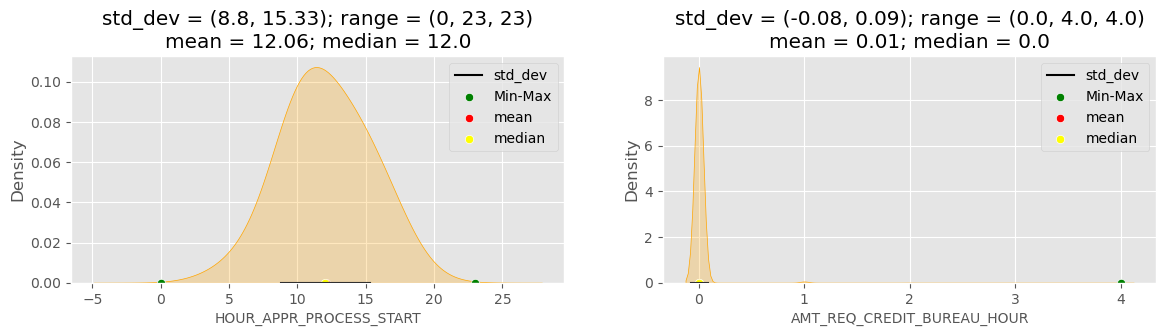

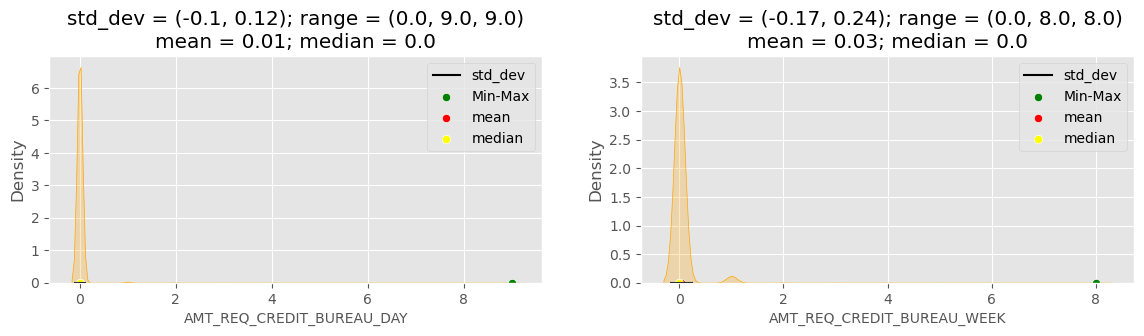

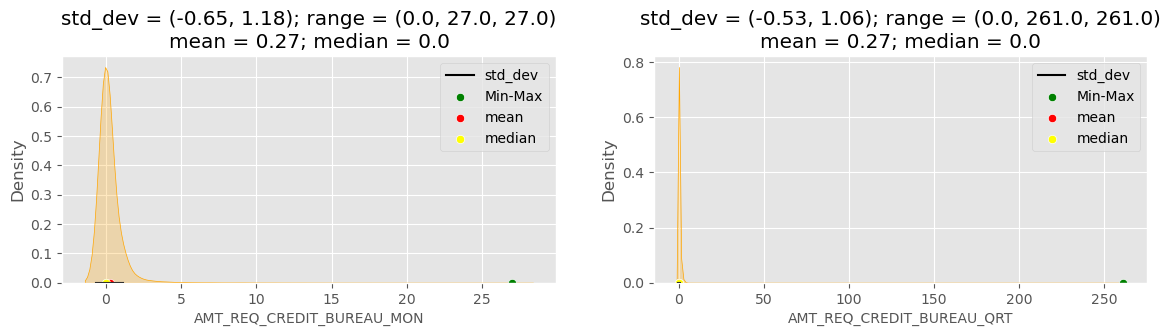

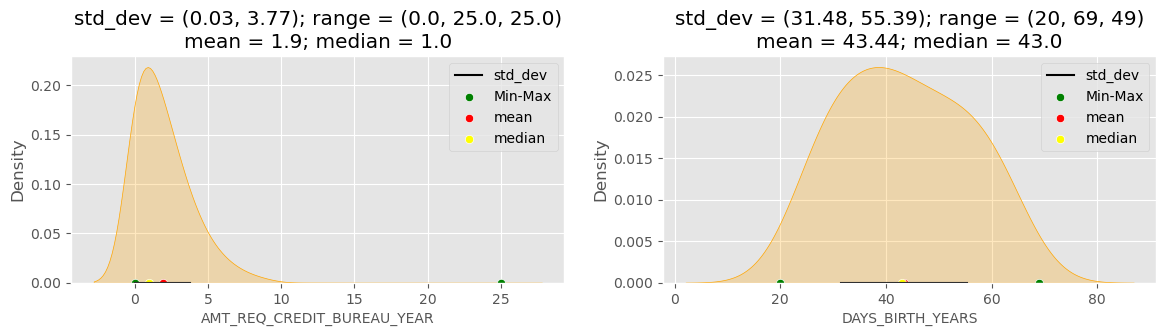

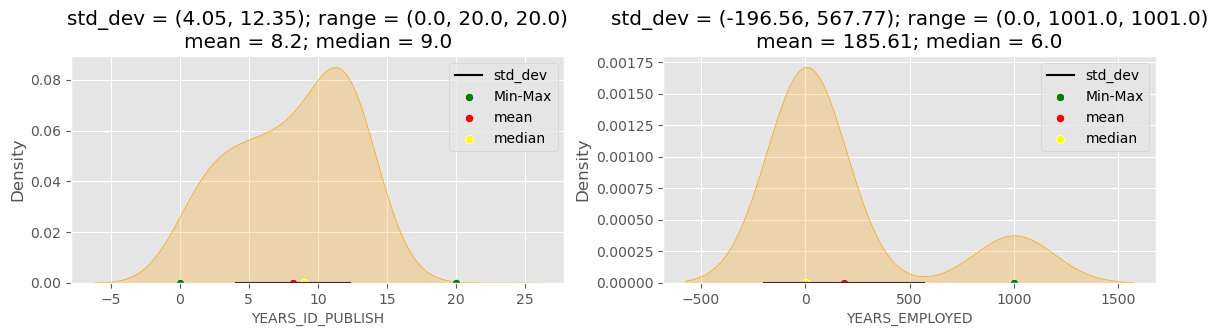

In [35]:
for i in range(0,len(Numerical),2):
    UAEnumerical(data,Numerical[i:i+2])

#### Bivariate Analysis : Numerical-Numerical

## With help of Correlation

In [36]:
numerical_col = data[Numerical]
numerical_col.dropna().corr()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEARS,YEARS_ID_PUBLISH,YEARS_EMPLOYED
TARGET,1.00,0.01,-0.02,-0.04,-0.02,-0.04,0.04,0.03,0.01,-0.00,-0.02,0.00,-0.00,0.00,-0.01,-0.00,0.03,-0.05,-0.03,-0.03
CNT_CHILDREN,0.01,1.00,0.01,-0.02,-0.00,-0.03,0.01,0.18,0.02,0.91,-0.01,-0.00,-0.00,-0.00,-0.01,-0.01,-0.03,-0.28,0.08,-0.18
AMT_INCOME_TOTAL,-0.02,0.01,1.00,0.32,0.41,0.17,-0.13,0.10,-0.03,-0.00,0.07,0.00,0.01,0.01,0.05,0.01,0.01,-0.02,-0.02,-0.10
AMT_CREDIT,-0.04,-0.02,0.32,1.00,0.75,0.09,-0.09,0.02,-0.01,0.02,0.04,-0.00,0.01,0.00,0.05,0.02,-0.05,0.12,0.02,-0.02
AMT_ANNUITY,-0.02,-0.00,0.41,0.75,1.00,0.11,-0.10,0.05,-0.02,0.03,0.04,0.00,0.00,0.02,0.03,0.02,-0.01,0.05,0.01,-0.05
REGION_POPULATION_RELATIVE,-0.04,-0.03,0.17,0.09,0.11,1.00,-0.08,-0.00,-0.01,-0.03,0.18,-0.01,0.00,0.00,0.08,-0.00,-0.01,0.04,-0.01,0.00
OWN_CAR_AGE,0.04,0.01,-0.13,-0.09,-0.10,-0.08,1.00,-0.03,-0.06,-0.01,-0.07,-0.00,-0.01,0.00,-0.02,-0.02,-0.01,-0.00,-0.01,0.03
FLAG_EMP_PHONE,0.03,0.18,0.10,0.02,0.05,-0.00,-0.03,1.00,0.17,0.15,0.06,0.00,0.00,-0.00,0.03,-0.01,-0.02,-0.51,-0.17,-1.00
FLAG_WORK_PHONE,0.01,0.02,-0.03,-0.01,-0.02,-0.01,-0.06,0.17,1.00,0.03,0.04,-0.01,-0.00,-0.00,0.00,-0.02,-0.06,-0.10,-0.00,-0.17
CNT_FAM_MEMBERS,-0.00,0.91,-0.00,0.02,0.03,-0.03,-0.01,0.15,0.03,1.00,-0.03,-0.00,-0.00,0.00,-0.01,-0.01,-0.01,-0.20,0.09,-0.15


## Heat Map

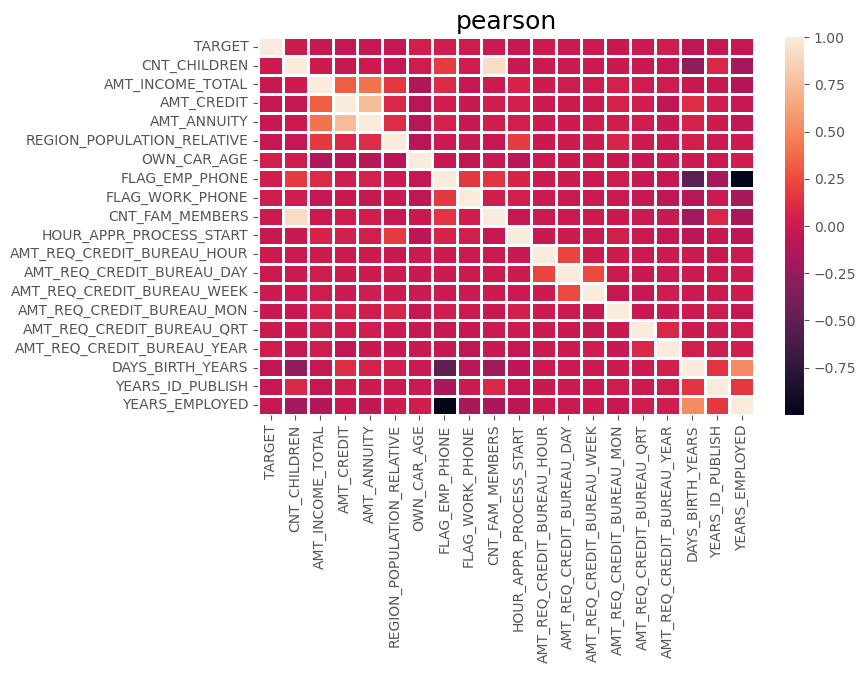

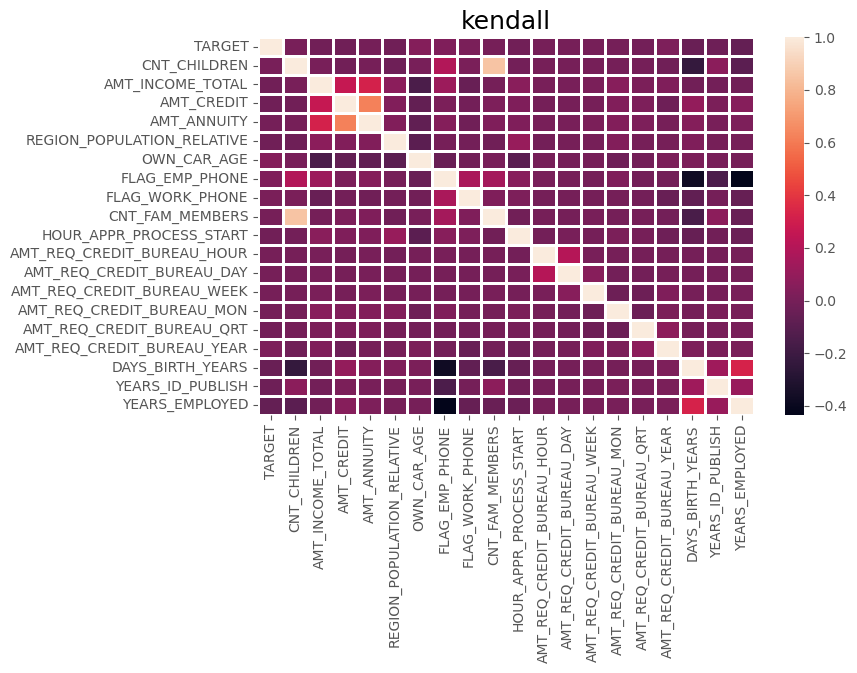

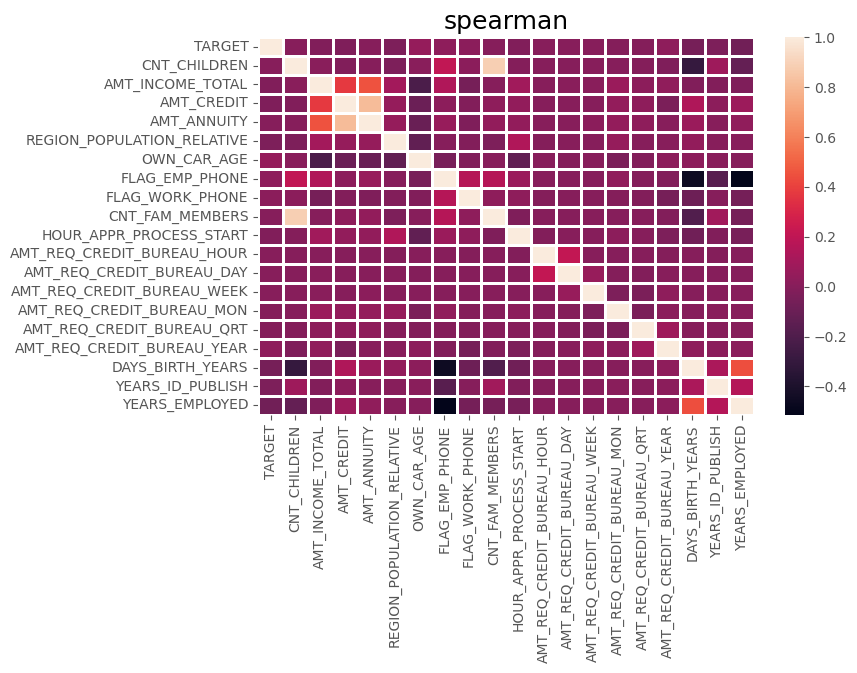

In [37]:
for_method=['pearson','kendall','spearman']
# plotting heatmap usill all methods for all numerical variables
for i in for_method:
    plt.figure(figsize=(8,5), dpi=100)
    correlation = numerical_col.dropna().corr(method=i)
    sns.heatmap(correlation, linewidth = 1)
    plt.title(i, fontsize=18)
    plt.show()

## Bivariate Analysis : Numerical-Categorical

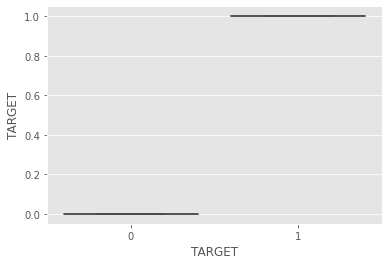

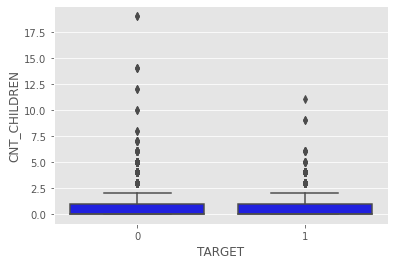

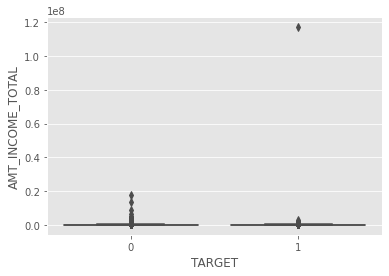

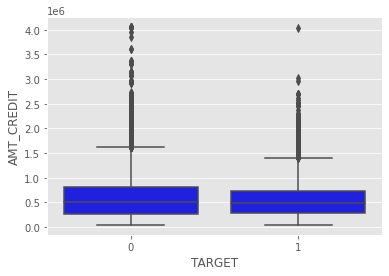

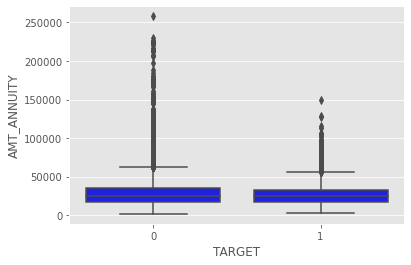

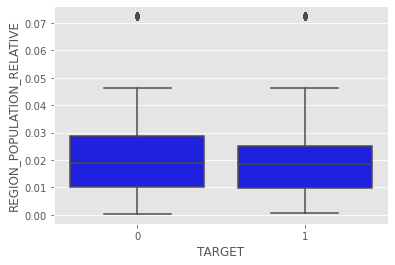

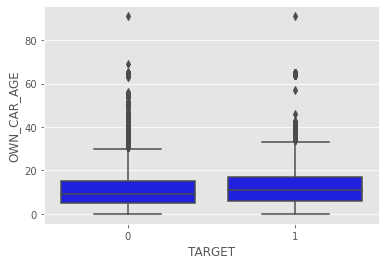

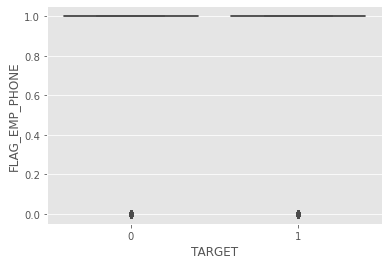

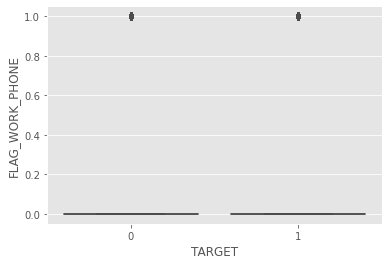

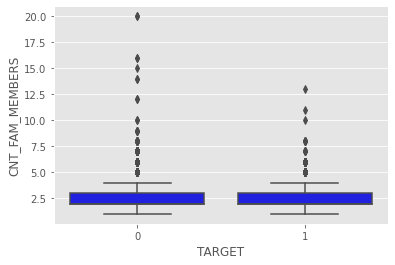

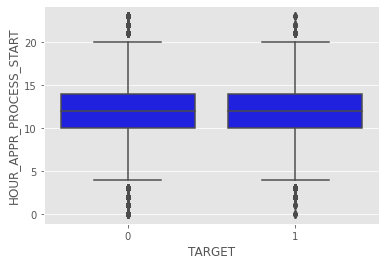

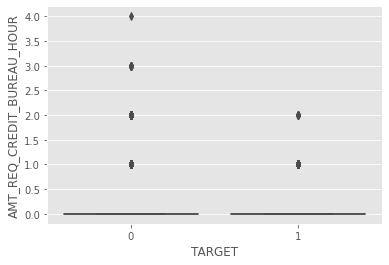

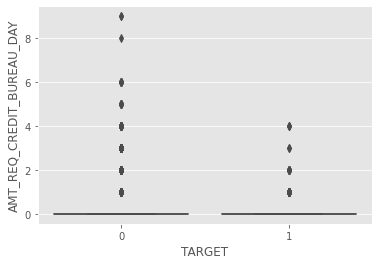

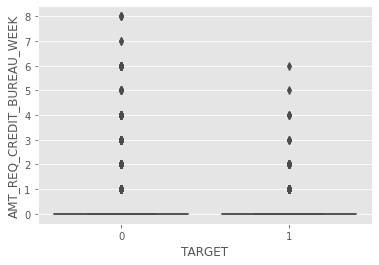

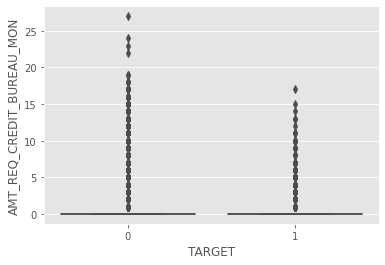

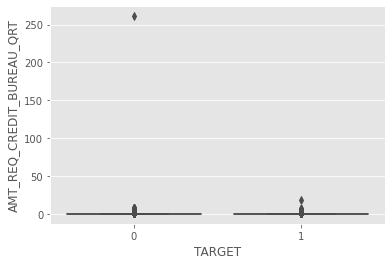

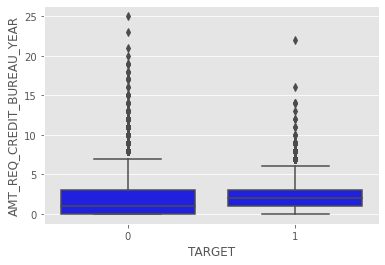

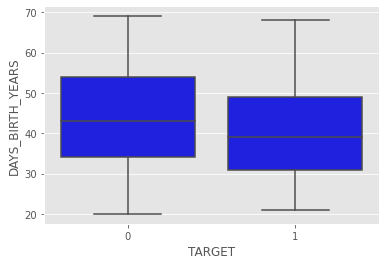

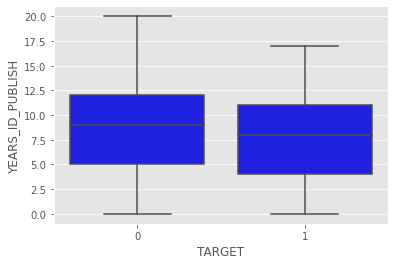

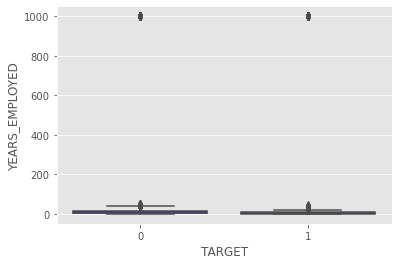

In [38]:
def NC_plot(Target,Numeric):
    sns.boxplot(x=Target,y=Numeric, color='b', orient='v')
    plt.show()
for i in Numerical:
    NC_plot(data['TARGET'],data[i])

## Bivariate Analysis : Categorical-Categorical

In [39]:
#Check the frequency count between th TARGET and CODE_GENDER features
pd.crosstab(data['TARGET'],data['CODE_GENDER'],normalize=True)*100


CODE_GENDER,Female,Male
TARGET,,
0,61.23,30.70
1,4.61,3.46


<p>Here<br>
Default of Male is less than Female<br>
but Not Default of Female is More male when compared</p>

In [40]:
#Check the frequency count between th TARGET and REGION_RATING_CLIENT features
pd.crosstab(data['TARGET'],data['REGION_RATING_CLIENT'],normalize=True)*100

REGION_RATING_CLIENT,1,2,3
TARGET,,,
0,9.97,67.99,13.97
1,0.50,5.82,1.74


In [41]:
#Check the frequency count between th TARGET and OCCUPATION_TYPE features
pd.crosstab(index=data['TARGET'],columns=data['OCCUPATION_TYPE'],normalize=True,)*100

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
TARGET,,,,,,,,,,,,,,,,,,
0,4.42,1.99,2.52,12.24,7.81,0.25,5.06,0.23,23.37,0.82,9.49,3.77,1.17,0.33,13.74,0.57,2.84,0.57
1,0.22,0.21,0.29,0.82,1.00,0.02,0.33,0.02,2.77,0.17,0.63,0.27,0.08,0.03,1.46,0.04,0.34,0.07


# Treating Missing Values


In [42]:
data.isnull().sum()/len(data)*100

TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
OWN_CAR_AGE                   65.99
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE               31.35
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

#### If there is no Car there will be no age so we are considering car age as 0 where there is no car

In [43]:
data['OWN_CAR_AGE']=np.where(data.FLAG_OWN_CAR=='No',0,data['OWN_CAR_AGE'])
#data['OWN_CAR_AGE']

#### Assuming that if there was no Request of credit details from bureau it is null so we are Replacing it with 0

In [44]:
def zero_rep(col_name):
    data[col_name]=data[col_name].replace(np.NaN,0)  

list1=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
for i in list1:
    zero_rep(i)

#### Since the Data missing is Greater than  5% of our data we are consedering it as others

In [45]:
data['OCCUPATION_TYPE'].fillna('Others',inplace=True)

In [46]:
pd.crosstab(data['CODE_GENDER'],data['OCCUPATION_TYPE'])

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Others,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
CODE_GENDER,,,,,,,,,,,,,,,,,,,
Female,9529,4314,5385,21781,925,524,7350,158,23139,320,11593,8297,73166,2538,689,28273,1247,2038,1182
Male,284,339,561,5788,17678,39,4030,368,32047,1772,9778,240,23223,114,62,3829,58,4683,166


### Droping the other Few Row with less nan Values


In [47]:
data.dropna(inplace=True)

In [48]:
data.isnull().sum()/len(data)*100

TARGET                        0.00
NAME_CONTRACT_TYPE            0.00
CODE_GENDER                   0.00
FLAG_OWN_CAR                  0.00
FLAG_OWN_REALTY               0.00
CNT_CHILDREN                  0.00
AMT_INCOME_TOTAL              0.00
AMT_CREDIT                    0.00
AMT_ANNUITY                   0.00
NAME_TYPE_SUITE               0.00
NAME_INCOME_TYPE              0.00
NAME_EDUCATION_TYPE           0.00
NAME_FAMILY_STATUS            0.00
NAME_HOUSING_TYPE             0.00
REGION_POPULATION_RELATIVE    0.00
OWN_CAR_AGE                   0.00
FLAG_EMP_PHONE                0.00
FLAG_WORK_PHONE               0.00
FLAG_CONT_MOBILE              0.00
FLAG_PHONE                    0.00
FLAG_EMAIL                    0.00
OCCUPATION_TYPE               0.00
CNT_FAM_MEMBERS               0.00
REGION_RATING_CLIENT          0.00
REGION_RATING_CLIENT_W_CITY   0.00
WEEKDAY_APPR_PROCESS_START    0.00
HOUR_APPR_PROCESS_START       0.00
REG_REGION_NOT_LIVE_REGION    0.00
REG_REGION_NOT_WORK_

## Checking for Outlier 


In [49]:
data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEARS,YEARS_ID_PUBLISH,YEARS_EMPLOYED
count,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00,306201.00
mean,0.08,0.42,168781.03,598798.65,27122.15,0.02,4.11,0.82,0.20,2.15,12.06,0.01,0.01,0.03,0.23,0.23,1.65,43.45,8.20,185.74
std,0.27,0.72,237522.13,401962.73,14490.91,0.01,9.02,0.38,0.40,0.91,3.27,0.08,0.10,0.19,0.86,0.74,1.86,11.95,4.15,382.27
min,0.00,0.00,25650.00,45000.00,1615.50,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00
25%,0.00,0.00,112500.00,270000.00,16551.00,0.01,0.00,1.00,0.00,2.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,34.00,5.00,3.00
50%,0.00,0.00,147600.00,513531.00,24930.00,0.02,0.00,1.00,0.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00,1.00,43.00,9.00,6.00
75%,0.00,1.00,202500.00,808650.00,34596.00,0.03,5.00,1.00,0.00,3.00,14.00,0.00,0.00,0.00,0.00,0.00,3.00,53.00,12.00,16.00
max,1.00,19.00,117000000.00,4050000.00,258025.50,0.07,91.00,1.00,1.00,20.00,23.00,4.00,9.00,8.00,27.00,261.00,25.00,69.00,20.00,1001.00


#### Since the the incom total is outlier, by consdering  OCCUPATION_TYPE , Assigning the Mean Income total


In [50]:
data['AMT_INCOME_TOTAL']=np.where(data['AMT_INCOME_TOTAL']==max(data['AMT_INCOME_TOTAL']),data['AMT_INCOME_TOTAL'].mean(),data['AMT_INCOME_TOTAL'])

#### Since the AMT_REQ_CREDIT_BUREAU_QRT is miss enter or out of the other entries, changing to Mode of that column


In [51]:
data['AMT_REQ_CREDIT_BUREAU_QRT']=np.where(data['AMT_REQ_CREDIT_BUREAU_QRT']==max(data['AMT_REQ_CREDIT_BUREAU_QRT']),data['AMT_REQ_CREDIT_BUREAU_QRT'].mode(),data['AMT_REQ_CREDIT_BUREAU_QRT'])

#### Since the YEARS_EMPLOYED cant be 1001 so we are replacing with next high value


In [52]:
data['YEARS_EMPLOYED']=np.where(data['YEARS_EMPLOYED']==max(data['YEARS_EMPLOYED']),max(data[data['YEARS_EMPLOYED']<1001].YEARS_EMPLOYED),data['YEARS_EMPLOYED'])

# Outlier Treating

In [53]:
def change_outlier(data, col_group,threshold=3):
    for i in col_group:

        q1= data[i].quantile(0.25)
        q3= data[i].quantile(0.75)
        IQR = q3 - q1
        whis_low = q1-(threshold*IQR)
        whis_high = q3+(threshold*IQR)
        data[i][data[i]>whis_high] = whis_high
        data[i][data[i]<whis_low] = whis_low
        

In [54]:
change_outlier(data,['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS'],4)

### Visually Checking the Distribution

In [55]:
def Out_dect(data,cont_group):
    size=len(cont_group)
    plt.figure(figsize=(7*size,3),dpi=100)
    #looping for each variable
 
    for i,j in enumerate(cont_group):   
        #Plotting the variable with every information   
        plt.subplot(1,size,i+1)
        plt.plot(data[j],color='blue')
        plt.title(j)

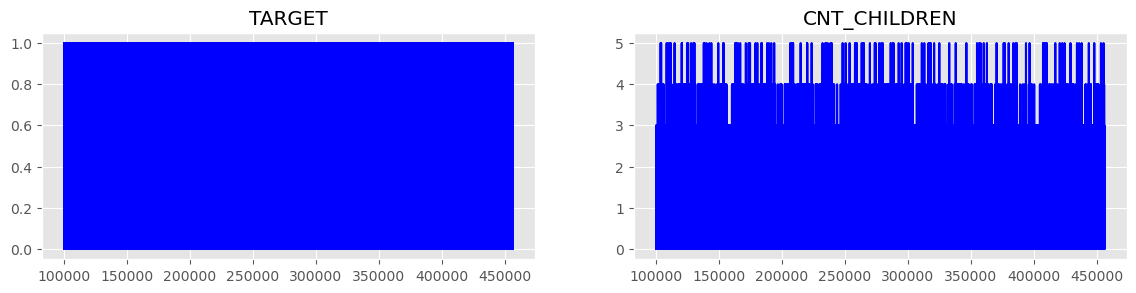

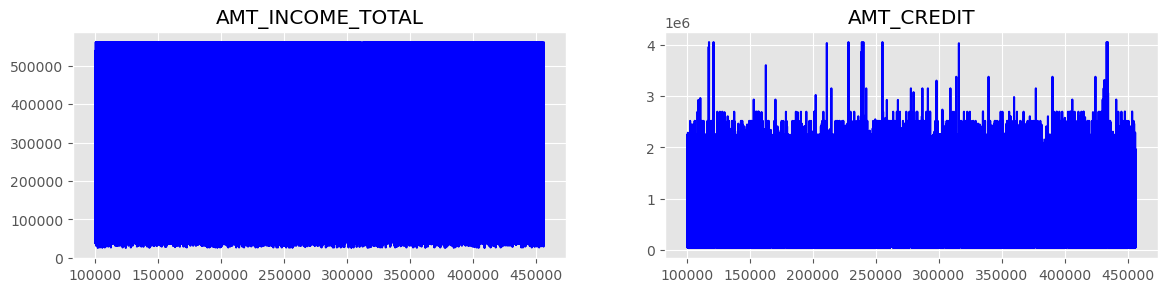

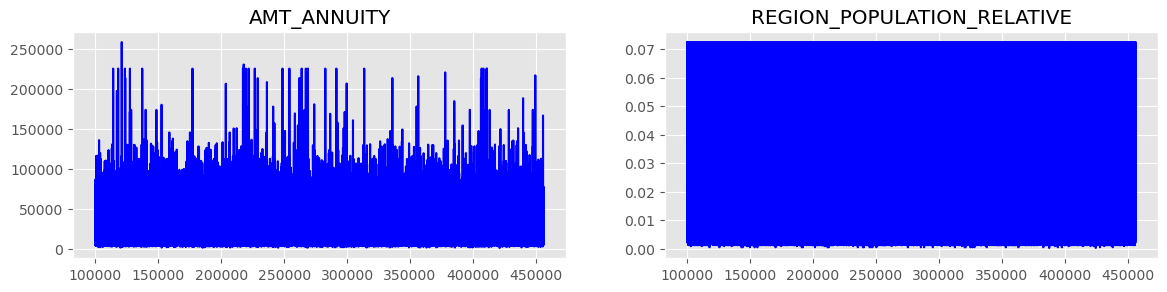

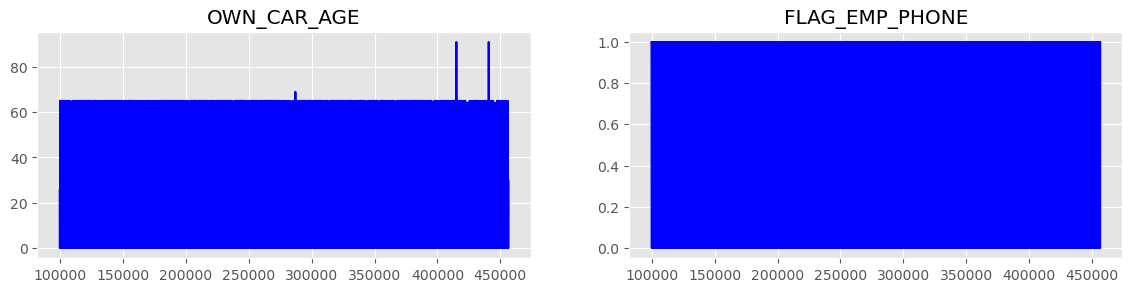

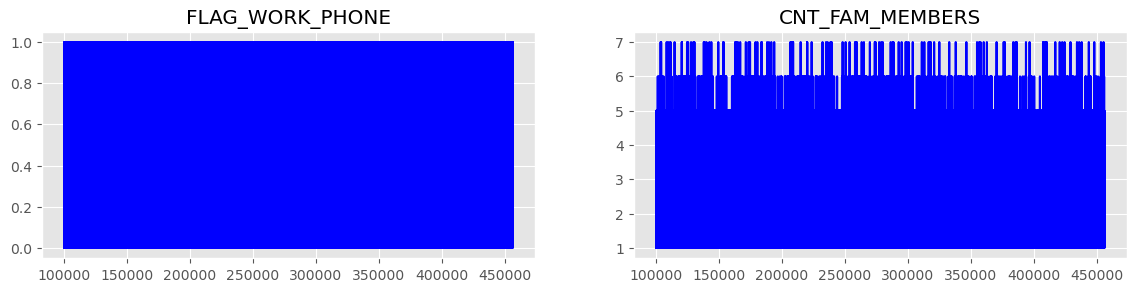

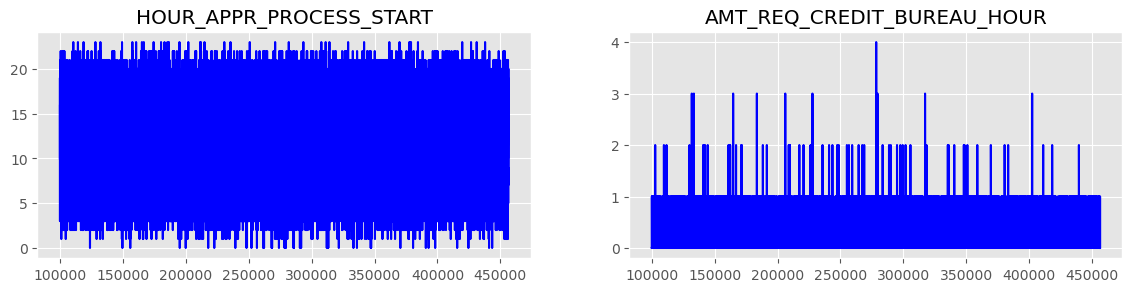

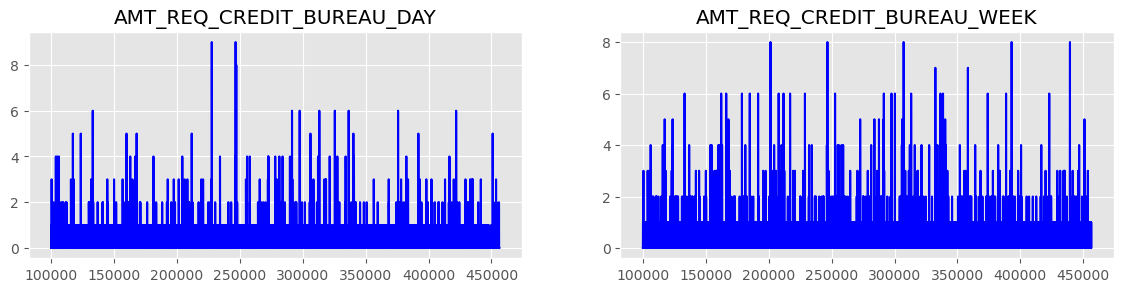

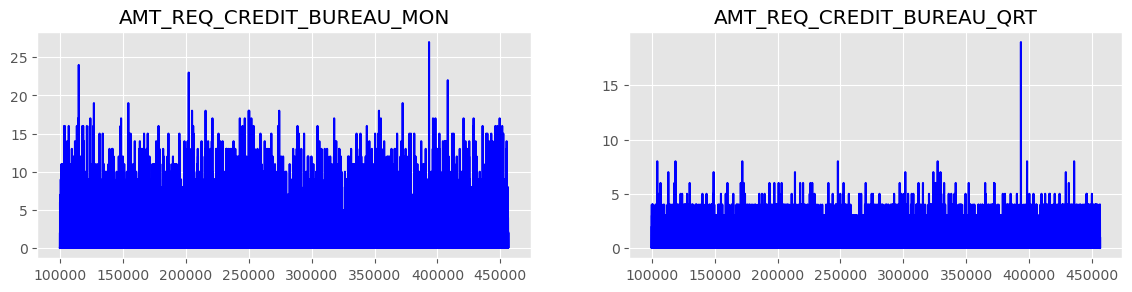

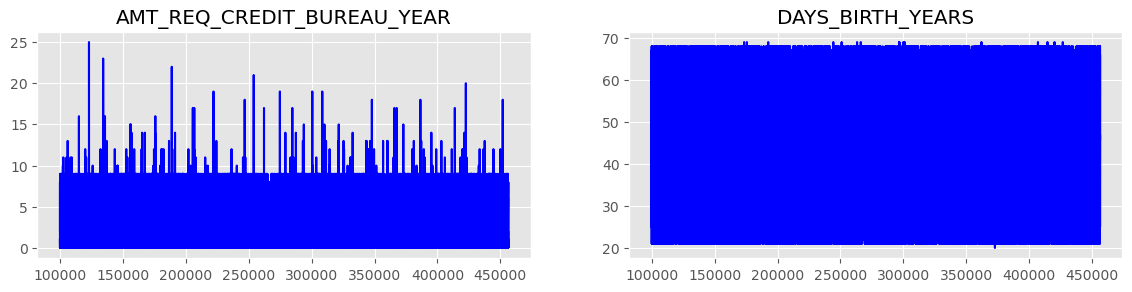

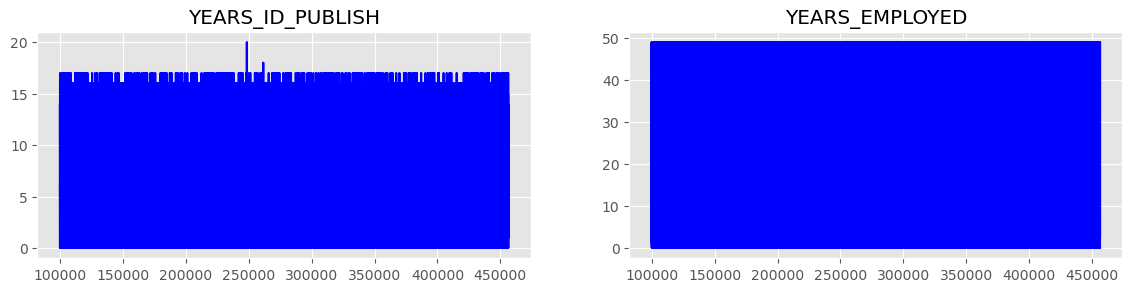

In [56]:
for i in range(0,len(Numerical),2):
    Out_dect(data,Numerical[i:i+2])

In [57]:
def categorical_feature_bar_chart(feature_name, pallete = 'Blues_d'):
    count = data[feature_name].value_counts(dropna = False).to_frame().reset_index()
    count.rename({'index': feature_name.lower(), feature_name: 'COUNT'}, axis=1, inplace= True)
    plt.figure(figsize=(10,5))
    plt.title("Number of applications by {}".format(feature_name))
    ax= data.groupby(feature_name,)['TARGET'].mean().sort_values().plot(kind='bar')

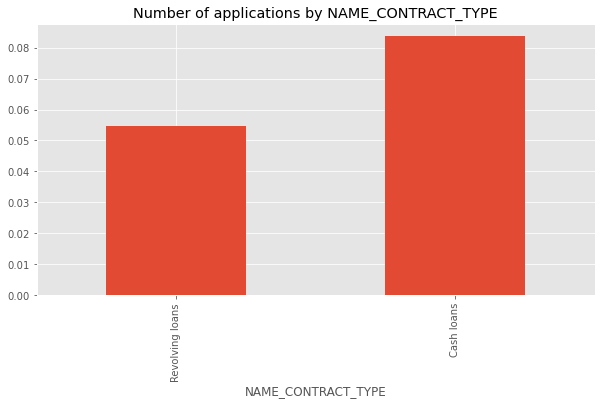

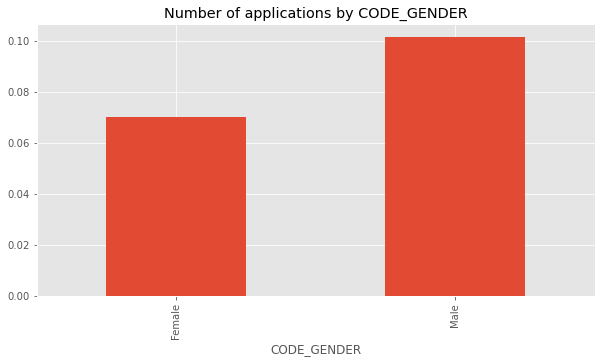

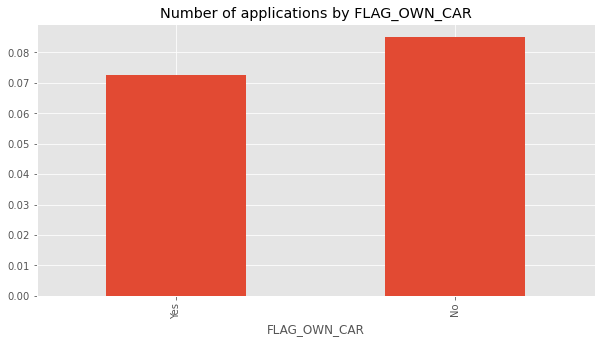

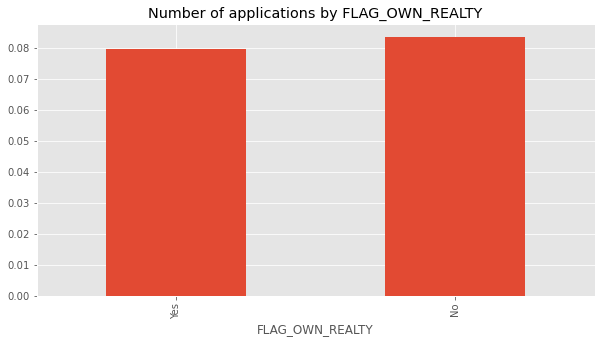

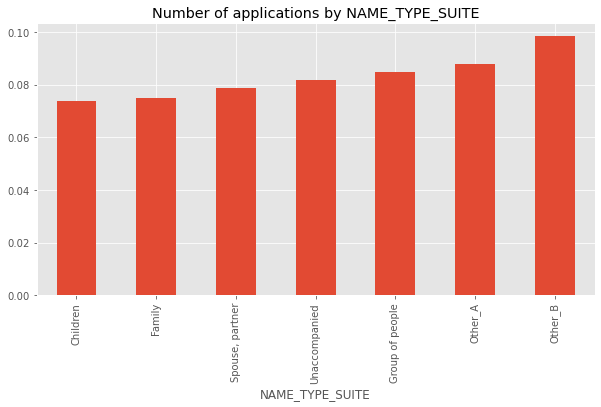

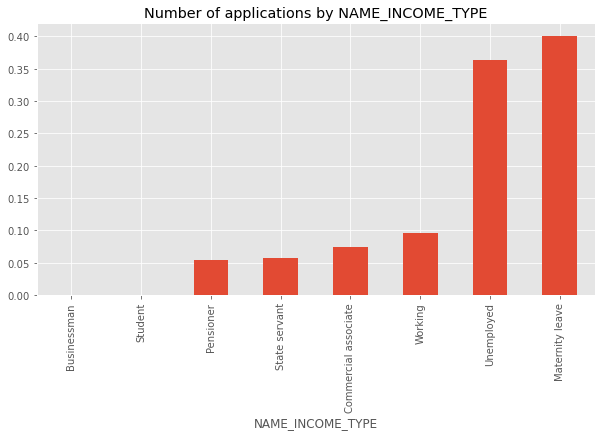

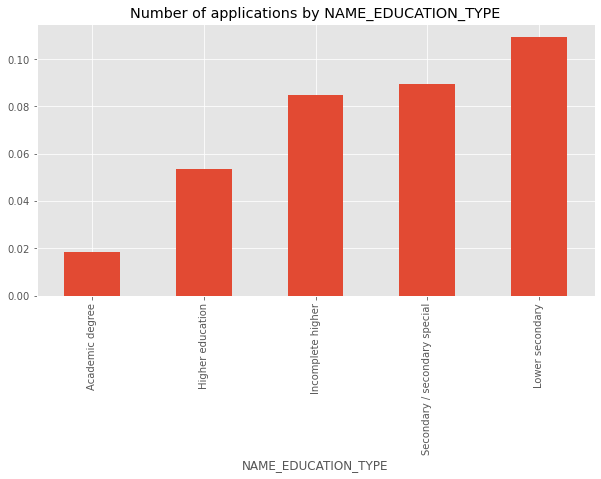

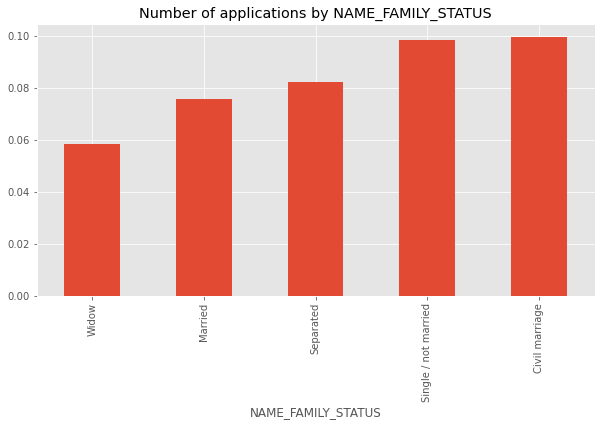

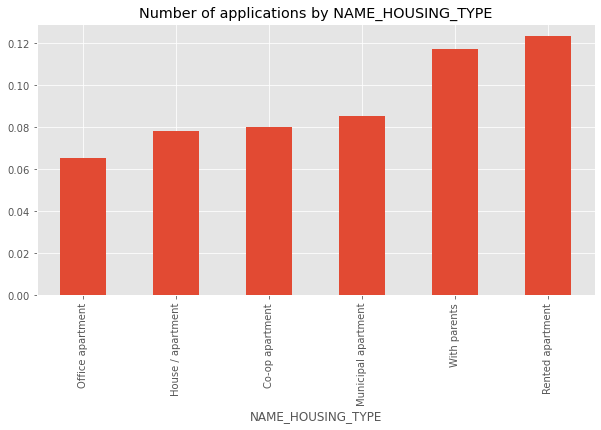

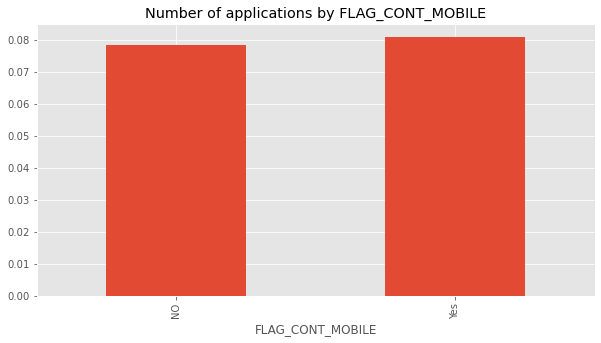

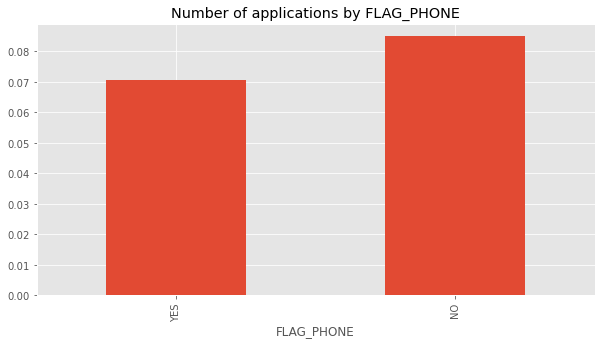

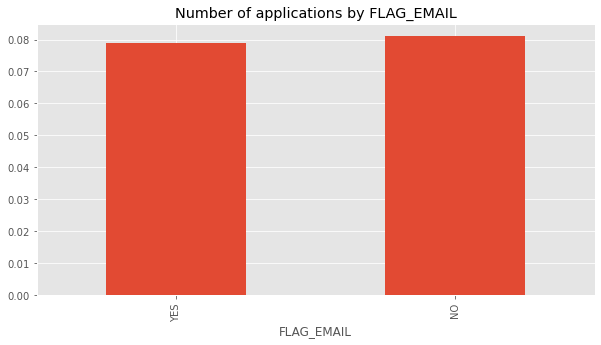

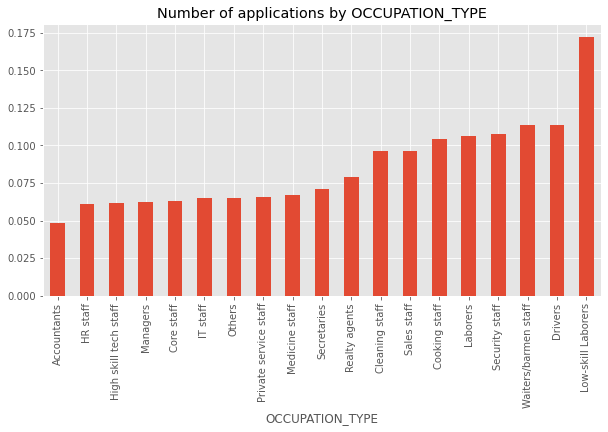

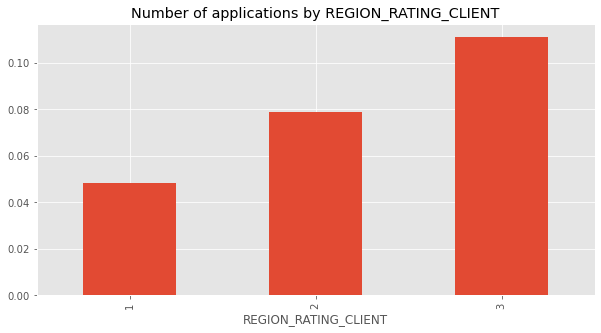

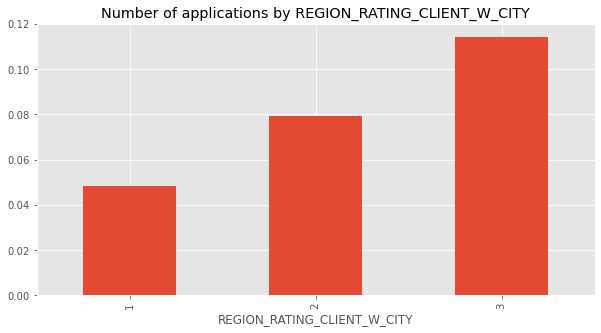

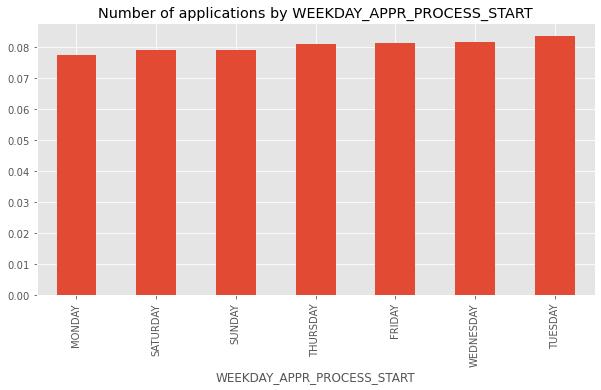

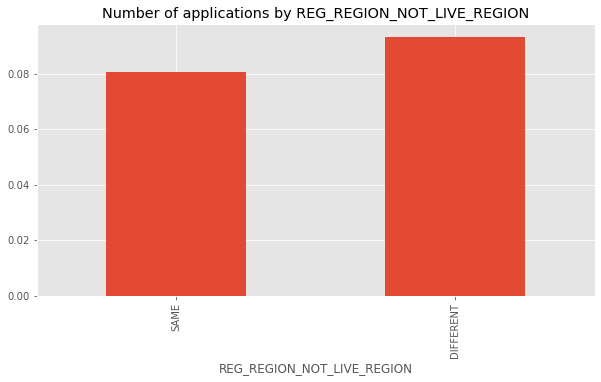

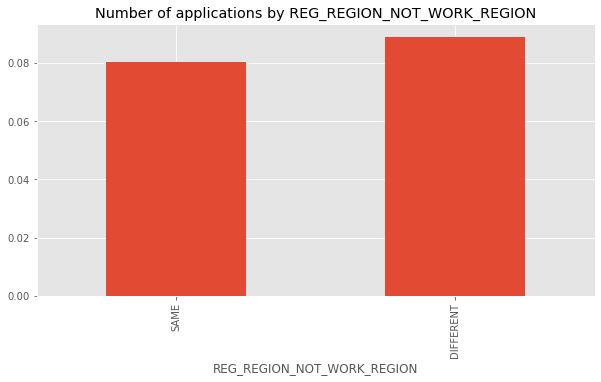

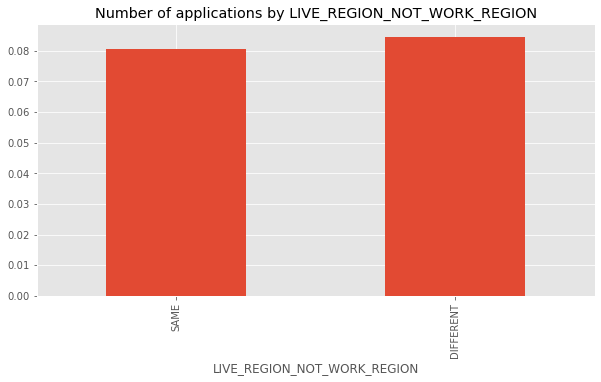

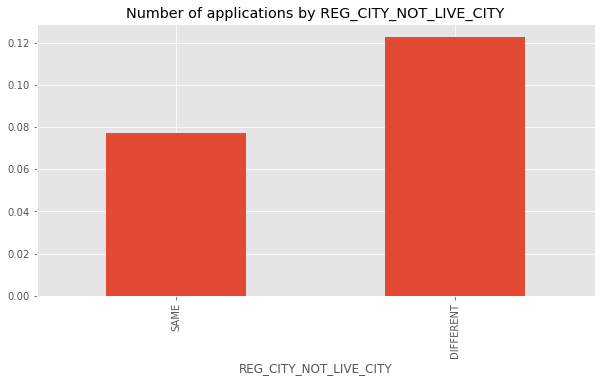

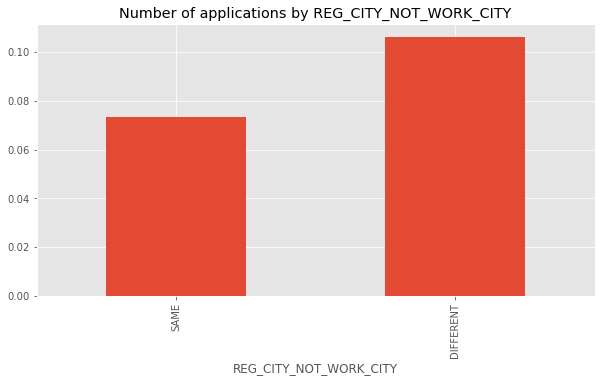

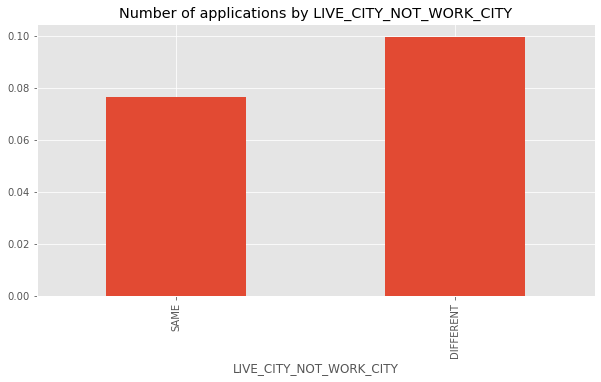

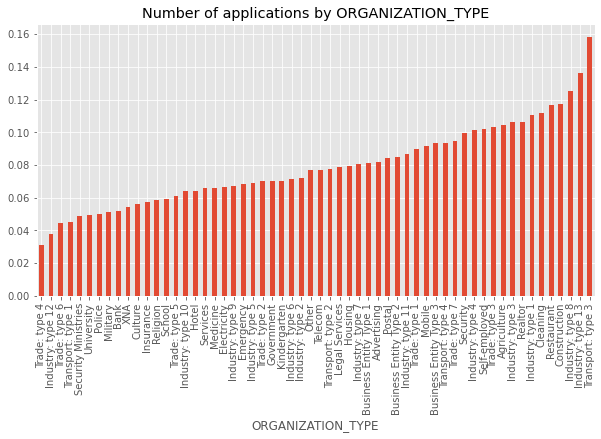

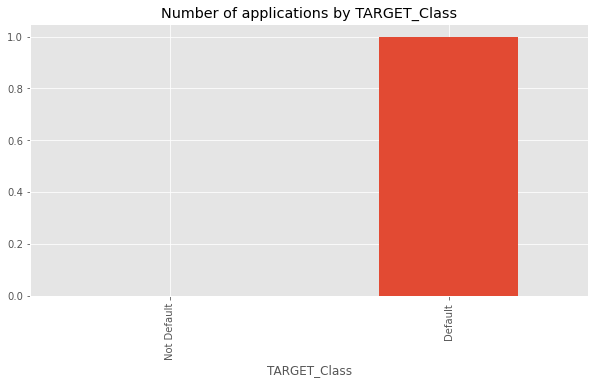

In [58]:
for i in categorical:
    categorical_feature_bar_chart(i,'Blues_d')

## Grouping Categorical variable

In [59]:
data['NAME_TYPE_SUITE_N']=data.NAME_TYPE_SUITE.map({'Children':'Children&Family','Family':'Children&Family',
                                                    'Spouse, partner':'Spouse&Unaccompanied',
                                                    'Unaccompanied':'Spouse&Unaccompanied',
                                                    'Group of people':'Group_of_people&Other_A','Other_A':'Group_of_people&Other_A','Other_B':'Other_B'})
data.NAME_TYPE_SUITE_N.unique()

array(['Spouse&Unaccompanied', 'Children&Family',
       'Group_of_people&Other_A', 'Other_B'], dtype=object)

In [60]:
del(data['NAME_TYPE_SUITE'])

In [61]:
data['NAME_INCOME_TYPE_N']=data['NAME_INCOME_TYPE'].map({'Unemployed':'Unemployed',
                                                         'Maternity leave':'Maternity leave'})
data['NAME_INCOME_TYPE_N'].fillna('Other_type',inplace=True)
data['NAME_INCOME_TYPE_N'].unique()

array(['Other_type', 'Unemployed', 'Maternity leave'], dtype=object)

In [62]:
del(data['NAME_INCOME_TYPE'])

In [63]:
data['NAME_EDUCATION_TYPE_N']=data['NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':'Secondary','Higher education':'Higher education','Incomplete higher':'Secondary','Lower secondary':'Lower secondary','Academic degree':'Academic degree'})
data['NAME_EDUCATION_TYPE_N'].unique()

array(['Secondary', 'Higher education', 'Lower secondary',
       'Academic degree'], dtype=object)

In [64]:
del(data['NAME_EDUCATION_TYPE'])

In [65]:
data['NAME_FAMILY_STATUS_N']=data['NAME_FAMILY_STATUS'].map({'Single / not married':'single/civi_marrage',
                                                             'Married':'Married/separated','Civil marriage':'single/civi_marrage',
                                                             'Widow':'Widow','Separated':'Married/separated'})
data['NAME_FAMILY_STATUS_N'].unique()

array(['single/civi_marrage', 'Married/separated', 'Widow'], dtype=object)

In [66]:
del(data['NAME_FAMILY_STATUS'])

In [67]:
data['NAME_HOUSING_TYPE_N']=data['NAME_HOUSING_TYPE'].map({ 'Rented apartment':'Rental_apartment/with_parents','With parents':'Rental_apartment/with_parents', 'Office apartment':'Office apartment' })
data['NAME_HOUSING_TYPE_N'].fillna('co/Municapal/apartment',inplace=True)
data['NAME_HOUSING_TYPE_N'].unique()

array(['co/Municapal/apartment', 'Rental_apartment/with_parents',
       'Office apartment'], dtype=object)

In [68]:
del(data['NAME_HOUSING_TYPE'])

In [69]:
data['OCCUPATION_TYPE_N']=data['OCCUPATION_TYPE'].map({'HR staff':'High_lev_staff',
                                                         'High skill tech staff':'High_lev_staff',
                                                         'Managers':'High_lev_staff','Core staff':'High_lev_staff',
                                                         'IT staff':'High_lev_staff','Others':'High_lev_staff',
                                                         'Private service staff':'High_lev_staff',
                                                         'Medicine staff':'High_lev_staff',
                                                         'Secretaries':'High_lev_staff',
                                                         'Realty agents':'High_lev_staff',
                                                         'Cleaning staff':'Medium_lev_staff',
                                                         'Sales staff':'Medium_lev_staff', 
                                                         'Cooking staff':'Medium_lev_staff', 
                                                         'Laborers':'Medium_lev_staff', 
                                                         'Security staff':'Medium_lev_staff',
                                                         'Waiters/barmen staff':'Medium_lev_staff',
                                                         'Drivers':'Medium_lev_staff',
                                                         'Accountants':'Accountants',
                                                         'Low-skill Laborers':'Low-skill Laborers'})
data['OCCUPATION_TYPE_N'].unique()

array(['Medium_lev_staff', 'High_lev_staff', 'Accountants',
       'Low-skill Laborers'], dtype=object)

In [70]:
del(data['OCCUPATION_TYPE'])

In [71]:
data['WEEKDAY_APPR_PROCESS_START_N']=data['WEEKDAY_APPR_PROCESS_START'].map({'MONDAY':'MONDAY','TUESDAY':'TUESDAY'})
data['WEEKDAY_APPR_PROCESS_START_N'].fillna('OtherDays',inplace=True)
data['WEEKDAY_APPR_PROCESS_START_N'].unique()


array(['OtherDays', 'MONDAY', 'TUESDAY'], dtype=object)

In [72]:
del(data['WEEKDAY_APPR_PROCESS_START'])

In [73]:
data['ORGANIZATION_TYPE_N']=data['ORGANIZATION_TYPE'].map({'Transport: type 3':'Type1', 'Industry: type 13':'Type2', 'Industry: type 8':'Type2',
       'Construction':'Type3', 'Restaurant':'Type3', 'Cleaning':'Type3', 'Industry: type 1':'Type3', 'Realtor':'Type3',
       'Industry: type 3':'Type3', 'Agriculture':'Type3', 'Trade: type 3':'Type3', 'Self-employed':'Type3',
       'Industry: type 4':'Type3', 'Security':'Type4', 'Trade: type 7':'Type4', 'Transport: type 4':'Type4',
       'Business Entity Type 3':'Type4', 'Mobile':'Type4', 'Trade: type 1':'Type4',
       'Industry: type 11':'Type4', 'Business Entity Type 2':'Type4', 'Postal':'Type4', 'Advertising':'Type4',
       'Business Entity Type 1':'Type4', 'Industry: type 7':'Type4', 'Housing':'Type5',
       'Legal Services':'Type5', 'Transport: type 2':'Type5', 'Telecom':'Type5', 'Other':'Type5',
       'Industry: type 2':'Type5', 'Industry: type 6':'Type5', 'Kindergarten':'Type5', 'Government':'Type5',
       'Trade: type 2':'Type5', 'Industry: type 5':'Type5', 'Emergency':'Type5', 'Industry: type 9':'Type5',
       'Electricity':'Type5', 'Medicine':'Type5', 'Services':'Type5', 'Hotel':'Type5', 'Industry: type 10':'Type5',
       'Trade: type 5':'Type5', 'School':'Type6', 'Religion':'Type6', 'Insurance':'Type6', 'Culture':'Type6', 'XNA':'Type6',
       'Bank':'Type6', 'Military':'Type6', 'Police':'Type6', 'University':'Type6', 'Security Ministries':'Type6',
       'Transport: type 1':'Type6', 'Trade: type 6':'Type6', 'Industry: type 12':'Type7',
       'Trade: type 4':'Type7'})
data['ORGANIZATION_TYPE_N'].unique()


array(['Type4', 'Type6', 'Type5', 'Type3', 'Type1', 'Type7', 'Type2'],
      dtype=object)

In [74]:
del(data['ORGANIZATION_TYPE'])

# One-Hot Encoding for Categorical variable

In [75]:
del(data['TARGET_Class'])

In [76]:
categorical=data.select_dtypes({"object"}).columns.tolist()
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_TYPE_SUITE_N',
 'NAME_INCOME_TYPE_N',
 'NAME_EDUCATION_TYPE_N',
 'NAME_FAMILY_STATUS_N',
 'NAME_HOUSING_TYPE_N',
 'OCCUPATION_TYPE_N',
 'WEEKDAY_APPR_PROCESS_START_N',
 'ORGANIZATION_TYPE_N']

In [77]:
data=pd.get_dummies(data,columns=categorical,drop_first=True)

In [78]:
data.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_N_Low-skill Laborers,OCCUPATION_TYPE_N_Medium_lev_staff,WEEKDAY_APPR_PROCESS_START_N_OtherDays,WEEKDAY_APPR_PROCESS_START_N_TUESDAY,ORGANIZATION_TYPE_N_Type2,ORGANIZATION_TYPE_N_Type3,ORGANIZATION_TYPE_N_Type4,ORGANIZATION_TYPE_N_Type5,ORGANIZATION_TYPE_N_Type6,ORGANIZATION_TYPE_N_Type7
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.00,406597.50,24700.50,0.02,0.00,1,0,1.00,...,0,1,1,0,0,0,1,0,0,0
100003,0,0,270000.00,1293502.50,35698.50,0.00,0.00,1,0,2.00,...,0,0,0,0,0,0,0,0,1,0
100004,0,0,67500.00,135000.00,6750.00,0.01,26.00,1,1,1.00,...,0,1,0,0,0,0,0,1,0,0
100006,0,0,135000.00,312682.50,29686.50,0.01,0.00,1,0,2.00,...,0,1,1,0,0,0,1,0,0,0
100007,0,0,121500.00,513000.00,21865.50,0.03,0.00,1,0,1.00,...,0,0,1,0,0,0,0,0,1,0


In [79]:
data.iloc[0]

TARGET                                                   1.00
CNT_CHILDREN                                             0.00
AMT_INCOME_TOTAL                                    202500.00
AMT_CREDIT                                          406597.50
AMT_ANNUITY                                          24700.50
REGION_POPULATION_RELATIVE                               0.02
OWN_CAR_AGE                                              0.00
FLAG_EMP_PHONE                                           1.00
FLAG_WORK_PHONE                                          0.00
CNT_FAM_MEMBERS                                          1.00
HOUR_APPR_PROCESS_START                                 10.00
AMT_REQ_CREDIT_BUREAU_HOUR                               0.00
AMT_REQ_CREDIT_BUREAU_DAY                                0.00
AMT_REQ_CREDIT_BUREAU_WEEK                               0.00
AMT_REQ_CREDIT_BUREAU_MON                                0.00
AMT_REQ_CREDIT_BUREAU_QRT                                0.00
AMT_REQ_

In [80]:
data.to_csv('Processed_data_without_ouliters.csv')

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score,precision_score, auc, roc_auc_score,f1_score

In [136]:
X = data.drop(columns=['TARGET'])
Y = data.TARGET

In [137]:
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,...,OCCUPATION_TYPE_N_Low-skill Laborers,OCCUPATION_TYPE_N_Medium_lev_staff,WEEKDAY_APPR_PROCESS_START_N_OtherDays,WEEKDAY_APPR_PROCESS_START_N_TUESDAY,ORGANIZATION_TYPE_N_Type2,ORGANIZATION_TYPE_N_Type3,ORGANIZATION_TYPE_N_Type4,ORGANIZATION_TYPE_N_Type5,ORGANIZATION_TYPE_N_Type6,ORGANIZATION_TYPE_N_Type7
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0,202500.00,406597.50,24700.50,0.02,0.00,1,0,1.00,10,...,0,1,1,0,0,0,1,0,0,0
100003,0,270000.00,1293502.50,35698.50,0.00,0.00,1,0,2.00,11,...,0,0,0,0,0,0,0,0,1,0
100004,0,67500.00,135000.00,6750.00,0.01,26.00,1,1,1.00,9,...,0,1,0,0,0,0,0,1,0,0
100006,0,135000.00,312682.50,29686.50,0.01,0.00,1,0,2.00,17,...,0,1,1,0,0,0,1,0,0,0
100007,0,121500.00,513000.00,21865.50,0.03,0.00,1,0,1.00,11,...,0,0,1,0,0,0,0,0,1,0


In [138]:
lg_model = LogisticRegression()
lg_model.fit(X,Y)

LogisticRegression()

In [139]:
Y.value_counts(normalize=True)

0   0.92
1   0.08
Name: TARGET, dtype: float64

In [140]:
data_1 = data[data.TARGET==1]
data_2 = data[data.TARGET==0].sample(frac=.07)

In [141]:
data[data.TARGET==0].describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,281446.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CNT_CHILDREN,281446.00,0.41,0.71,0.00,0.00,0.00,1.00,5.00
AMT_INCOME_TOTAL,281446.00,167349.52,86683.76,25650.00,112500.00,148500.00,202500.00,562500.00
AMT_CREDIT,281446.00,602412.05,406315.95,45000.00,270000.00,517788.00,810000.00,4050000.00
AMT_ANNUITY,281446.00,27177.22,14656.12,1615.50,16456.50,24900.75,34780.50,258025.50
REGION_POPULATION_RELATIVE,281446.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
OWN_CAR_AGE,281446.00,4.10,8.99,0.00,0.00,0.00,5.00,91.00
FLAG_EMP_PHONE,281446.00,0.81,0.39,0.00,1.00,1.00,1.00,1.00
FLAG_WORK_PHONE,281446.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
CNT_FAM_MEMBERS,281446.00,2.15,0.90,1.00,2.00,2.00,3.00,7.00


In [142]:
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,19701.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CNT_CHILDREN,19701.00,0.42,0.72,0.00,0.00,0.00,1.00,5.00
AMT_INCOME_TOTAL,19701.00,167019.47,86186.14,26100.00,112500.00,148500.00,202500.00,562500.00
AMT_CREDIT,19701.00,601717.69,404305.31,45000.00,270000.00,517500.00,810000.00,2931660.00
AMT_ANNUITY,19701.00,27140.72,14584.06,1980.00,16456.50,24799.50,34911.00,225000.00
REGION_POPULATION_RELATIVE,19701.00,0.02,0.01,0.00,0.01,0.02,0.03,0.07
OWN_CAR_AGE,19701.00,4.17,9.19,0.00,0.00,0.00,5.00,91.00
FLAG_EMP_PHONE,19701.00,0.81,0.39,0.00,1.00,1.00,1.00,1.00
FLAG_WORK_PHONE,19701.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
CNT_FAM_MEMBERS,19701.00,2.15,0.91,1.00,2.00,2.00,3.00,7.00


In [143]:
data_1.shape,data_2.shape

((24755, 60), (19701, 60))

In [144]:
data_full = pd.concat([data_1,data_2],axis=0)
data_full.shape

(44456, 60)

In [145]:
data_full = pd.concat([data_1,data_2],axis=0)
X = data_full.drop(columns=['TARGET'])
Y = data_full.TARGET

In [146]:
Y.value_counts(normalize=True)

1   0.56
0   0.44
Name: TARGET, dtype: float64

#### Setting the LogisticRegression to balanced class


In [147]:
lg_model = LogisticRegression(class_weight='balanced')

In [148]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [149]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=.3,shuffle=True,stratify=Y)

In [150]:
ytrain.value_counts(normalize=True),ytest.value_counts(normalize=True)

(1   0.56
 0   0.44
 Name: TARGET, dtype: float64,
 1   0.56
 0   0.44
 Name: TARGET, dtype: float64)

In [151]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(31119, 59)
(13337, 59)
(31119,)
(13337,)


In [152]:
lg_model = LogisticRegression(class_weight='balanced')
lg_model.fit(xtrain,ytrain)

LogisticRegression(class_weight='balanced')

In [153]:
Y_train_pred = lg_model.predict(xtrain)
Y_test_pred = lg_model.predict(xtest)

In [154]:
confusion_matrix(ytrain,Y_train_pred,labels=[1,0]) # 1= Default, 0=non default

array([[7668, 9660],
       [5163, 8628]], dtype=int64)

In [155]:
confusion_matrix(ytest,Y_test_pred,labels=[1,0]) # 1= Default, 0=non default

array([[3274, 4153],
       [2266, 3644]], dtype=int64)

In [156]:
# LG with Balanced Class and unbiased distribution of target class
accuracy_score(ytrain,Y_train_pred),accuracy_score(ytest,Y_test_pred),f1_score(ytrain,Y_train_pred),f1_score(ytest,Y_test_pred)

(0.5236672129567146,
 0.5187073554772438,
 0.5085049239033125,
 0.5049741651885555)

<h4><strong> Obervation :</strong></h4><p> Accuaracy and F1_Score has Improved than Base Model</p>

##### Logistic Regression with Hyperparameter tunning with 

In [157]:
clf = LogisticRegression(solver='saga')

In [158]:
search_space = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                    'tol':[.00001,.0001,.001,.01,.7],
                    'C':[1,2,3,4], 'fit_intercept':[True,False], 'solver':['saga'],'l1_ratio':[.001,1]}
search_space

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.7],
 'C': [1, 2, 3, 4],
 'fit_intercept': [True, False],
 'solver': ['saga'],
 'l1_ratio': [0.001, 1]}

In [159]:
random_clf = RandomizedSearchCV(estimator=clf, param_distributions=search_space, n_iter=5, scoring='f1', cv=2)

In [160]:
random_clf.fit(xtrain,ytrain)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(solver='saga'), n_iter=5,
                   param_distributions={'C': [1, 2, 3, 4],
                                        'fit_intercept': [True, False],
                                        'l1_ratio': [0.001, 1],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['saga'],
                                        'tol': [1e-05, 0.0001, 0.001, 0.01,
                                                0.7]},
                   scoring='f1')

In [161]:
random_clf.best_params_

{'tol': 0.01,
 'solver': 'saga',
 'penalty': 'l1',
 'l1_ratio': 0.001,
 'fit_intercept': False,
 'C': 4}

In [162]:
pd.DataFrame(random_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tol,param_solver,param_penalty,param_l1_ratio,param_fit_intercept,param_C,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.97,0.23,0.02,0.00,0.01,saga,l1,0.00,False,4,"{'tol': 0.01, 'solver': 'saga', 'penalty': 'l1...",0.69,0.71,0.70,0.01,1
1,2.30,0.02,0.01,0.00,0.00,saga,l1,1,True,4,"{'tol': 0.0001, 'solver': 'saga', 'penalty': '...",0.69,0.71,0.70,0.01,4
2,1.26,0.11,0.02,0.00,0.00,saga,l1,1,True,2,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'l...",0.69,0.71,0.70,0.01,3
3,2.04,0.04,0.01,0.00,0.00,saga,l1,0.00,False,4,"{'tol': 1e-05, 'solver': 'saga', 'penalty': 'l...",0.69,0.71,0.70,0.01,4
4,1.12,0.01,0.01,0.01,0.00,saga,l2,1,True,3,"{'tol': 0.001, 'solver': 'saga', 'penalty': 'l...",0.69,0.71,0.70,0.01,2


In [163]:
ytrain_pred = random_clf.predict(xtrain)
ytest_pred = random_clf.predict(xtest)


In [164]:
confusion_matrix(ytest,Y_test_pred,labels=[1,0]) # 1= Default, 0=non default

array([[3274, 4153],
       [2266, 3644]], dtype=int64)

In [165]:
accuracy_score(ytest,ytest_pred),accuracy_score(ytrain,ytrain_pred),f1_score(ytrain,ytrain_pred),f1_score(ytest,ytest_pred)


(0.5614456024593237,
 0.5621645939779556,
 0.6993136627457904,
 0.6998511828398419)

<h4><strong> Obervation :</strong></h4><p> Accuaracy and F1_Score has Improved after Hyperparameter with Random Search</p>

In [166]:
clf = LogisticRegression(**random_clf.best_params_)

# clf = LogisticRegression(C=1,tol=.001,)

In [167]:
clf.fit(xtrain,ytrain)

LogisticRegression(C=4, fit_intercept=False, l1_ratio=0.001, penalty='l1',
                   solver='saga', tol=0.01)

In [168]:
search_space = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                    'tol':[.00001,.0001,.001,.01,.7],
                    'C':[1,2,3,4], 'fit_intercept':[True,False], 'solver':['saga'],'l1_ratio':[.001,1]}
search_space

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.7],
 'C': [1, 2, 3, 4],
 'fit_intercept': [True, False],
 'solver': ['saga'],
 'l1_ratio': [0.001, 1]}

In [169]:
grid_clf = GridSearchCV(estimator=clf, param_grid=search_space, scoring='f1', cv=2,verbose=1)

In [172]:
grid_clf.fit(xtrain,ytrain)

Fitting 2 folds for each of 320 candidates, totalling 640 fits


GridSearchCV(cv=2,
             estimator=LogisticRegression(C=4, fit_intercept=False,
                                          l1_ratio=0.001, penalty='l1',
                                          solver='saga', tol=0.01),
             param_grid={'C': [1, 2, 3, 4], 'fit_intercept': [True, False],
                         'l1_ratio': [0.001, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga'],
                         'tol': [1e-05, 0.0001, 0.001, 0.01, 0.7]},
             scoring='f1', verbose=1)

In [174]:
grid_clf.best_params_

{'C': 1,
 'fit_intercept': True,
 'l1_ratio': 0.001,
 'penalty': 'l2',
 'solver': 'saga',
 'tol': 0.7}

In [175]:
pd.DataFrame(grid_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_l1_ratio,param_penalty,param_solver,param_tol,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,2.59,0.07,0.02,0.00,1,True,0.00,l1,saga,0.00,"{'C': 1, 'fit_intercept': True, 'l1_ratio': 0....",0.69,0.71,0.70,0.01,163
1,2.25,0.00,0.02,0.00,1,True,0.00,l1,saga,0.00,"{'C': 1, 'fit_intercept': True, 'l1_ratio': 0....",0.69,0.71,0.70,0.01,163
2,1.52,0.10,0.02,0.00,1,True,0.00,l1,saga,0.00,"{'C': 1, 'fit_intercept': True, 'l1_ratio': 0....",0.69,0.71,0.70,0.01,106
3,0.72,0.00,0.02,0.00,1,True,0.00,l1,saga,0.01,"{'C': 1, 'fit_intercept': True, 'l1_ratio': 0....",0.69,0.71,0.70,0.01,87
4,0.12,0.02,0.03,0.00,1,True,0.00,l1,saga,0.70,"{'C': 1, 'fit_intercept': True, 'l1_ratio': 0....",0.70,0.70,0.70,0.00,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,1.26,0.01,0.02,0.00,4,False,1,none,saga,0.00,"{'C': 4, 'fit_intercept': False, 'l1_ratio': 1...",0.69,0.71,0.70,0.01,163
316,1.27,0.00,0.02,0.00,4,False,1,none,saga,0.00,"{'C': 4, 'fit_intercept': False, 'l1_ratio': 1...",0.69,0.71,0.70,0.01,163
317,0.84,0.01,0.02,0.00,4,False,1,none,saga,0.00,"{'C': 4, 'fit_intercept': False, 'l1_ratio': 1...",0.69,0.71,0.70,0.01,142
318,0.42,0.00,0.02,0.00,4,False,1,none,saga,0.01,"{'C': 4, 'fit_intercept': False, 'l1_ratio': 1...",0.69,0.71,0.70,0.01,73


In [176]:
Y_train_pred = grid_clf.predict(xtrain)
Y_test_pred = grid_clf.predict(xtest)

In [177]:
accuracy_score(ytrain,Y_train_pred),accuracy_score(ytest,Y_test_pred),f1_score(ytrain,Y_train_pred),f1_score(ytest,Y_test_pred)

(0.556798097625245, 0.5568718602384344, 0.7153118936547909, 0.7153727605471008)

<h4><strong> Obervation :</strong></h4><p> Accuaracy is aprox same and F1_Score has Improved after Hyperparameter with Grid Search</p>